

#### BANKING: DIRECT MARKETING CASE STUDY (CAMPAIGN RESPONSE MODEL) - CLASSIFICATION MODEL

**OBJECTIVE:** This example uses data related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed ('yes') or not ('no').

##### Bank client data:
- age (numeric)
- job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


##### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### NOTES ABOUT RESPONSE MODELS:
#### Targeting the Right Prospects: What are Response Models?

Response models use data mining to find similarities between responders from previous marketing campaigns to predict who is likely or not likely to respond to a future campaign. The model is then scored against the prospects of the new campaign and a marketer can choose to mail only those people that are most likely to purchase. This increases conversions and decreases costs by only mailing to those most likely to respond.

- Direct Marketing Models: Good, Better, Best

Not all models are created equal. Here’s a quick summary of different types of direct marketing models:

#### GOOD. Recency, Frequency, Monetary (RFM) models:

- simple, better than not modeling

- Though very basic, many marketers still rely on RFM models. Technically RFM models aren’t actually response models since they are descriptive but not truly predictive. This method emphasizes customer behavior and segments by how recently a customer purchased, how often they purchase, and how much they spend.

- RFM can identify good customers and provide a lift in response rates versus not using any targeting. Another benefit is that it is both simple and descriptive, so it is easily understood by business people.

- Unfortunately, RFM doesn’t take into account life stage and assumes that customers are likely to continue to respond the same way. If RFM is the only targeting method, the most attractive segments are likely to be over-marketed to at the expense of other segments that could be invested in.

#### BETTER. Traditional Response or Regression Models: 
- more sophisticated and predictive than RFM

- Regression models determine the correlation between variables. Unlike RFM models, regression takes into account that scores can quickly change when combined with other variables. 

- The model is developed specifically to predict a desired behavior, such as response. Response models require both responder and non-responder data to identify patterns of those likely to respond to a marketing campaign.

- This is by far the most widely used approach for marketers and has been a mainstay of predictive analytics for decades.

#### BEST. Multi-Channel Customer Level Response Models: 
- A New Approach that Outperforms Traditional

- This innovative approach identifies not only those prospects most likely to purchase, but also which marketing channel they are most likely to respond to. This allows marketers to optimize their marketing budgets most effectively by contacting the prospect in the channel(s) they prefer and are most likely to be moved by.

- Multi-Channel Customer Level Response Models are different from traditional response models in that all of a prospect’s known activity is taken into account – email opens, web browsing, display ad click-throughs, mobile, purchase behavior – and not just direct mail behavior. With a more holistic view of the customer, a marketer can create the ideal customer contact strategy for each customer.

- In a recent head-to-head in the mail test with a major cataloger, the Multi-Channel Customer Level Response Model outperformed the traditional response model with a more than +14% lift in response rate. This increase translates into millions of dollars in new annual revenue at the current spend. A new subject line or pretty picture won’t drive revenue like that!

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.formula.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 432x216 with 0 Axes>

In [203]:
dir(imb)

['CHECK_CACHE_VERSION',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_check_module_dependencies',
 'version']

In [2]:
## Load the data
data=pd.read_csv('bank-additional.csv', sep=";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,4119
Total Missing (%),0.0%
Total size in memory,675.9 KiB
Average record size in memory,168.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,2


### Exporting pandas profiling output to html file

In [6]:
output = pandas_profiling.ProfileReport(data)

In [7]:
output.to_file(outputfile='pandas_profiling.html')

### Basic Exploratory Analysis

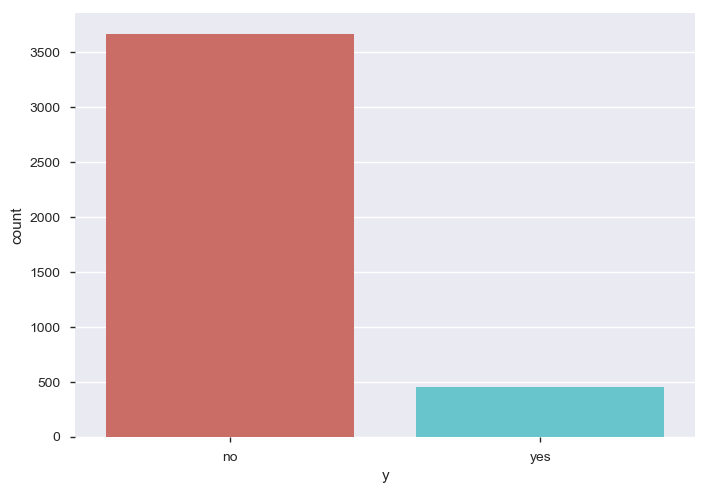

In [8]:
#dependent variable distribution (response vs. non response)
sns.countplot(x='y',data=data, palette='hls')
plt.show()

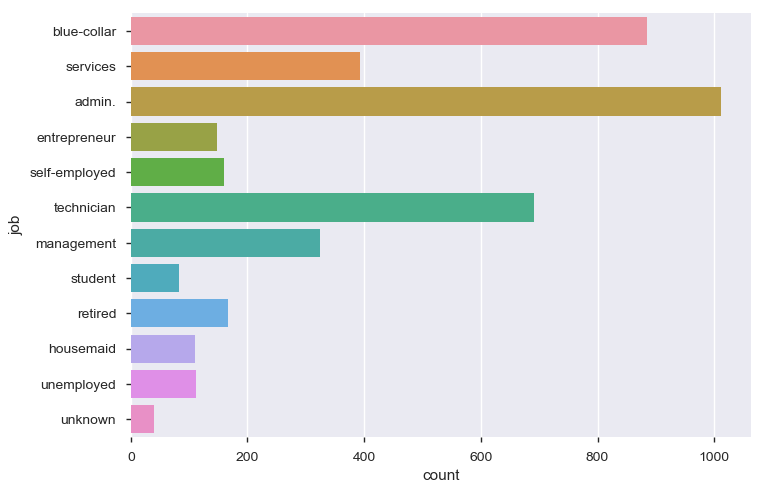

In [9]:
#Customer Job Distribution

sns.countplot(y="job", data=data)
plt.show()

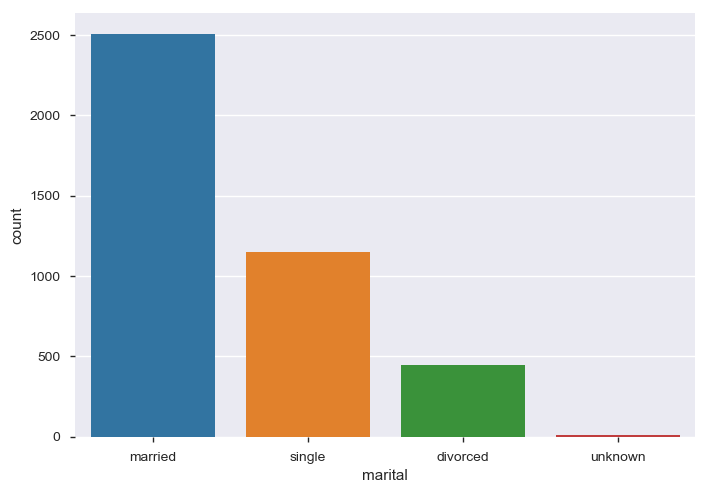

In [10]:
#Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

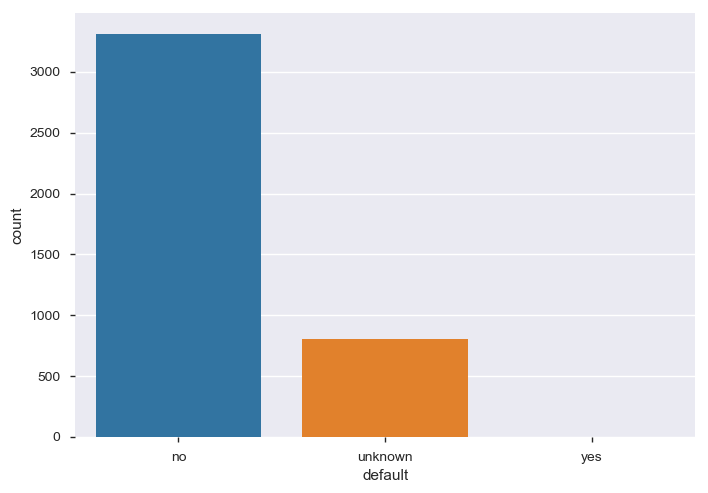

In [11]:
# Distribution of Default
sns.countplot(x="default", data=data)
plt.show()

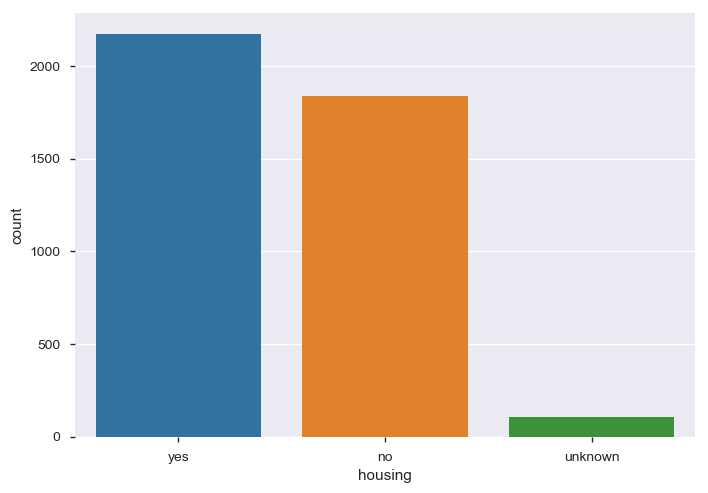

In [12]:
#house loan Distribution
sns.countplot(x="housing", data=data)
plt.show()

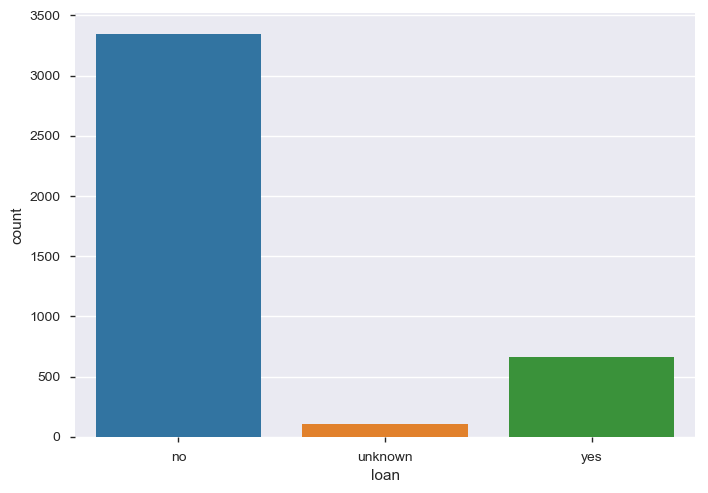

In [13]:
#personal Loan
sns.countplot(x="loan", data=data)
plt.show()

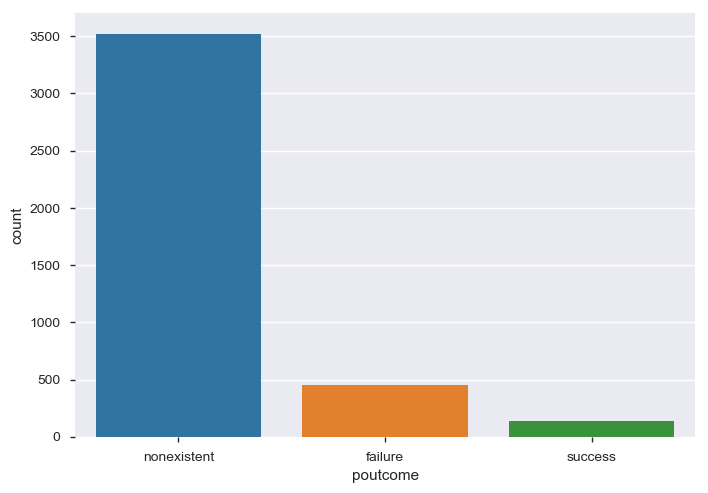

In [14]:
# Previous Marketing campaign response
sns.countplot(x="poutcome", data=data)
plt.show()

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [15]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


##### Observations:
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [16]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [17]:
data_num=data[numeric_var_names]
data_num.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


In [18]:
data_cat = data[cat_var_names]
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no


In [19]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [20]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,4119.0,0.0,1.652280e+05,40.113620,38.000,10.313362,106.365426,18.000,24.000,26.0000,28.800,32.000,38.000,47.000,55.000,58.000,68.000,88.000
duration,4119.0,0.0,1.057710e+06,256.788055,181.000,254.703736,64873.993194,0.000,11.000,35.0000,60.000,103.000,181.000,317.000,545.200,740.200,1231.660,3643.000
campaign,4119.0,0.0,1.045100e+04,2.537266,2.000,2.568159,6.595442,1.000,1.000,1.0000,1.000,1.000,2.000,3.000,5.000,7.000,13.000,35.000
pdays,4119.0,0.0,3.955979e+06,960.422190,999.000,191.922786,36834.355710,0.000,3.000,999.0000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,4119.0,0.0,7.840000e+02,0.190337,0.000,0.541788,0.293535,0.000,0.000,0.0000,0.000,0.000,0.000,0.000,1.000,1.000,3.000,6.000
emp.var.rate,4119.0,0.0,3.500000e+02,0.084972,1.100,1.563114,2.443327,-3.400,-3.400,-2.9000,-1.800,-1.800,1.100,1.400,1.400,1.400,1.400,1.400
cons.price.idx,4119.0,0.0,3.854548e+05,93.579704,93.749,0.579349,0.335645,92.201,92.201,92.7130,92.893,93.075,93.749,93.994,94.465,94.465,94.601,94.767
cons.conf.idx,4119.0,0.0,-1.668158e+05,-40.499102,-41.800,4.594578,21.110142,-50.800,-50.000,-47.1000,-46.200,-42.700,-41.800,-36.400,-36.100,-33.600,-26.900,-26.900
euribor3m,4119.0,0.0,1.491636e+04,3.621356,4.857,1.733591,3.005339,0.635,0.677,0.8084,1.029,1.334,4.857,4.961,4.964,4.966,4.968,5.045
nr.employed,4119.0,0.0,2.128074e+07,5166.481695,5191.000,73.667904,5426.960015,4963.600,4963.600,5008.7000,5076.200,5099.100,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100


In [21]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

In [22]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

In [23]:
data_num.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.040934,-0.008758,-0.035564,0.033328,-0.010420,0.001573,0.096817,-0.004651,-0.028978
duration,0.040934,1.000000,-0.089582,-0.049637,0.030562,-0.032984,0.014668,-0.033930,-0.039042,-0.051082
campaign,-0.008758,-0.089582,1.000000,0.062852,-0.099728,0.183264,0.147637,0.013359,0.165349,0.167031
pdays,-0.035564,-0.049637,0.062852,1.000000,-0.585427,0.270687,0.061562,-0.094064,0.301296,0.381992
previous,0.033328,0.030562,-0.099728,-0.585427,1.000000,-0.437248,-0.191644,-0.054162,-0.477506,-0.528209
emp.var.rate,-0.010420,-0.032984,0.183264,0.270687,-0.437248,1.000000,0.758841,0.194679,0.970390,0.897173
cons.price.idx,0.001573,0.014668,0.147637,0.061562,-0.191644,0.758841,1.000000,0.051647,0.661925,0.478685
cons.conf.idx,0.096817,-0.033930,0.013359,-0.094064,-0.054162,0.194679,0.051647,1.000000,0.275962,0.104488
euribor3m,-0.004651,-0.039042,0.165349,0.301296,-0.477506,0.970390,0.661925,0.275962,1.000000,0.942507
nr.employed,-0.028978,-0.051082,0.167031,0.381992,-0.528209,0.897173,0.478685,0.104488,0.942507,1.000000


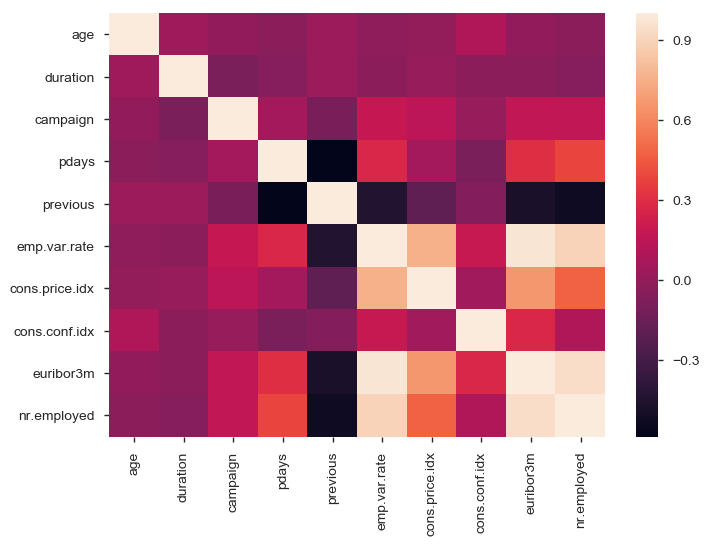

In [24]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_num.corr())

In [25]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [26]:
cat_summary

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
N,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
NMISS,0,0,0,0,0,0,0,0,0,0,0
ColumnsNames,admin. 1012 blue-collar 884 te...,married 2509 single 1153 divorced ...,university.degree 1264 high.school ...,no 3315 unknown 803 yes ...,yes 2175 no 1839 unknown 10...,no 3349 yes 665 unknown 10...,cellular 2652 telephone 1467 Name: cont...,may 1378 jul 711 aug 636 jun 53...,thu 860 mon 855 tue 841 wed 795 fr...,nonexistent 3523 failure 454 succes...,"no 3668 yes 451 Name: y, dtype: int64"


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [27]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    #col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [28]:
cat_var_names

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [29]:
#for c_feature in categorical_features
data_cat_new = data_cat
for c_feature in cat_var_names:
    data_cat_new[c_feature] = data_cat_new[c_feature].astype('category')
    data_cat_new = create_dummies(data_cat_new , c_feature )

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
data_cat_new.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [31]:
data_new = pd.concat([data_num, data_cat_new], axis=1)

In [32]:
data_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30.0,487.0,2.0,999.0,0.0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,0,0,1,0,0
1,39.0,346.0,4.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,0,0,1,0,0
2,25.0,227.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,1,0,0
3,38.0,17.0,3.0,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,1,0,0
4,47.0,58.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.191,5195.8,...,1,0,0,1,0,0,0,1,0,0


In [33]:
data_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [34]:
data_new.columns= [var.strip().replace('-', '_') for var in data_new.columns]
data_new.columns= [var.strip().replace('.', '_') for var in data_new.columns]
data_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

##### Feature Selection

#### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [35]:
data_new.drop(columns=['pdays', 'cons_price_idx', 'nr_employed', 'euribor3m' ], axis=1, inplace=True)

In [36]:
data_new.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_conf_idx', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

#### Variable reduction using WOE or log(odds)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


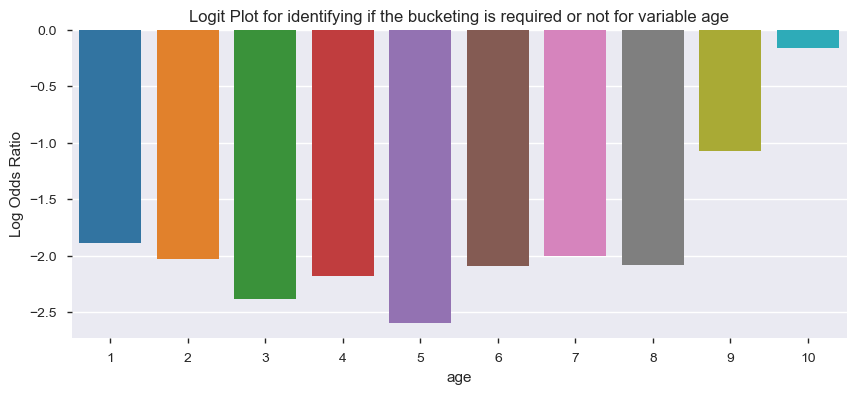

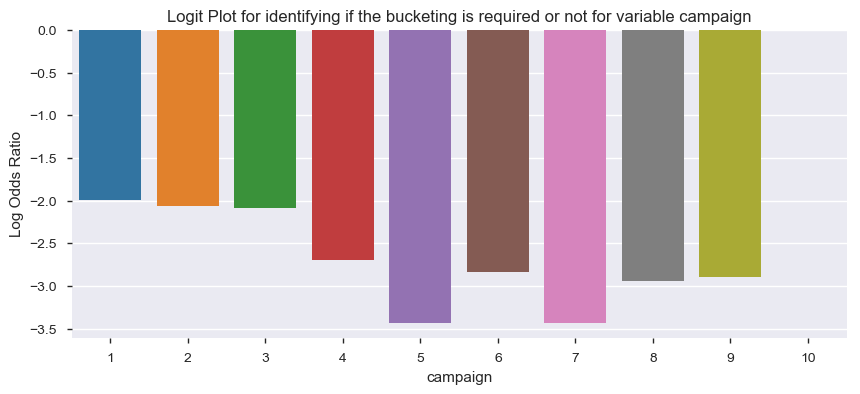

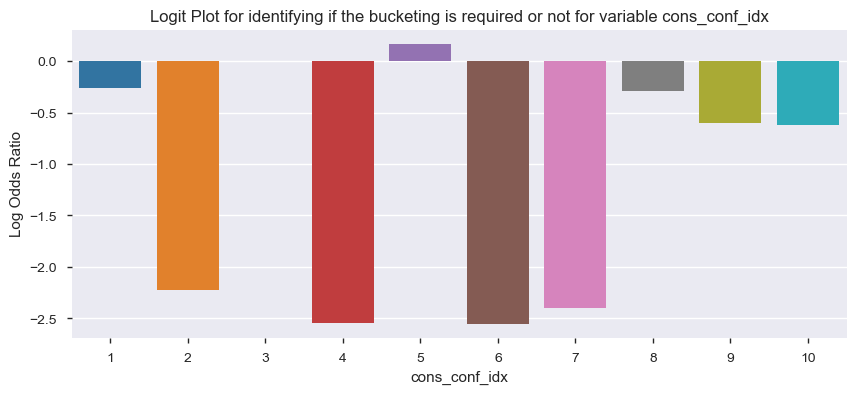

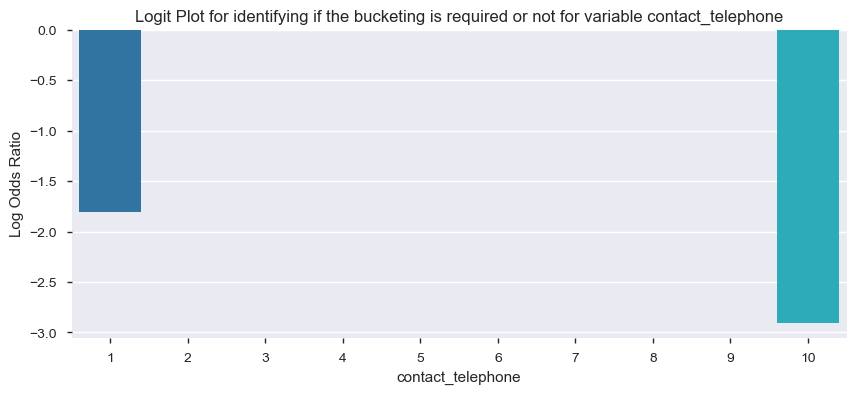

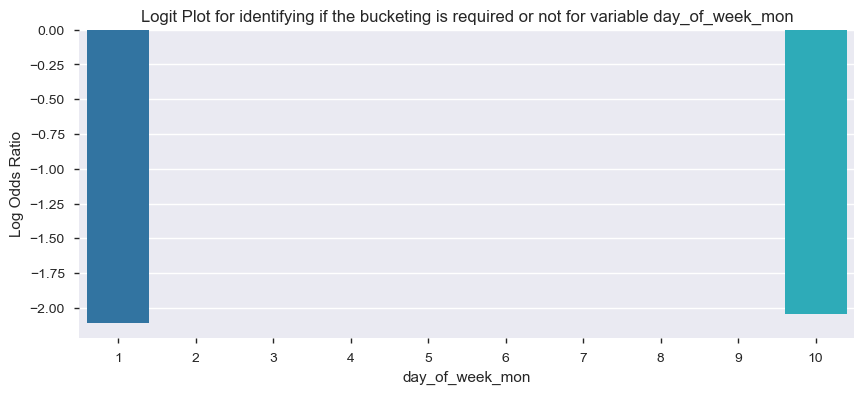

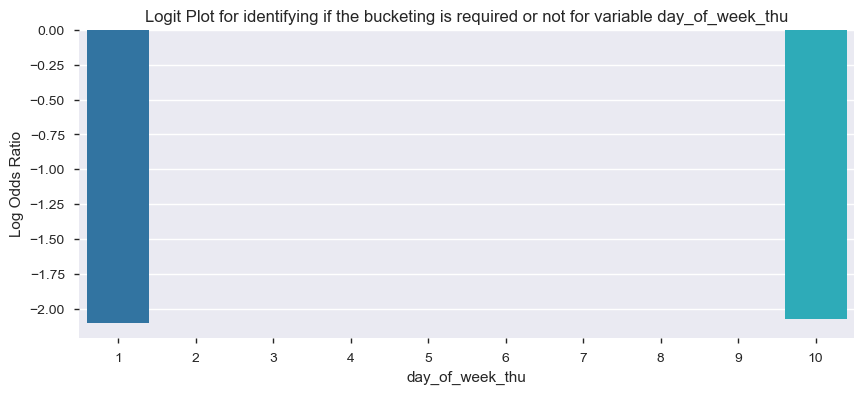

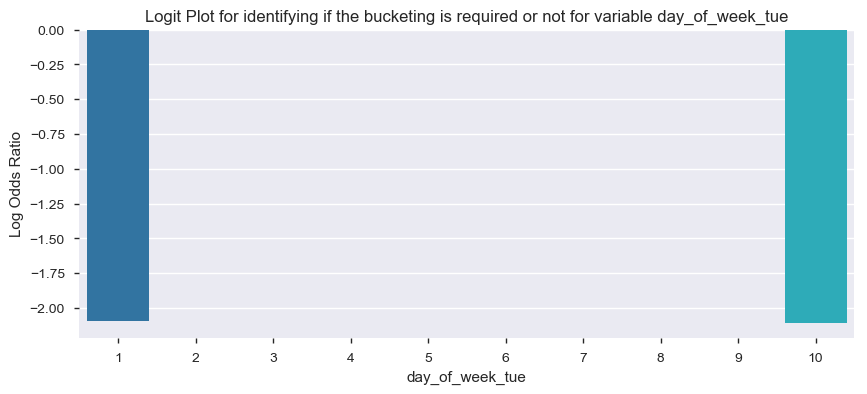

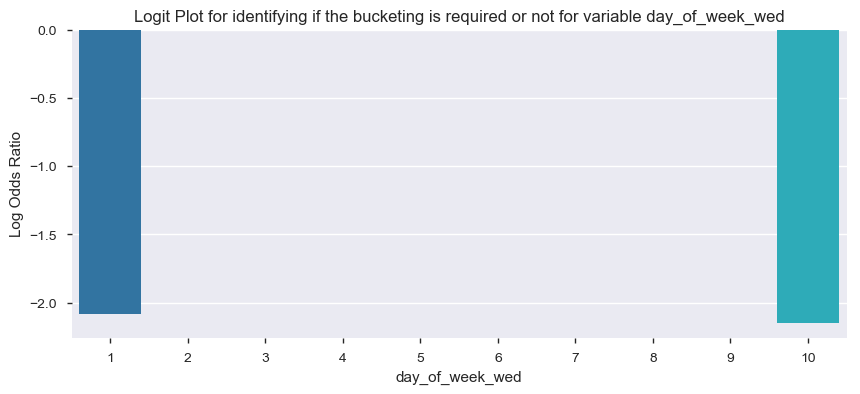

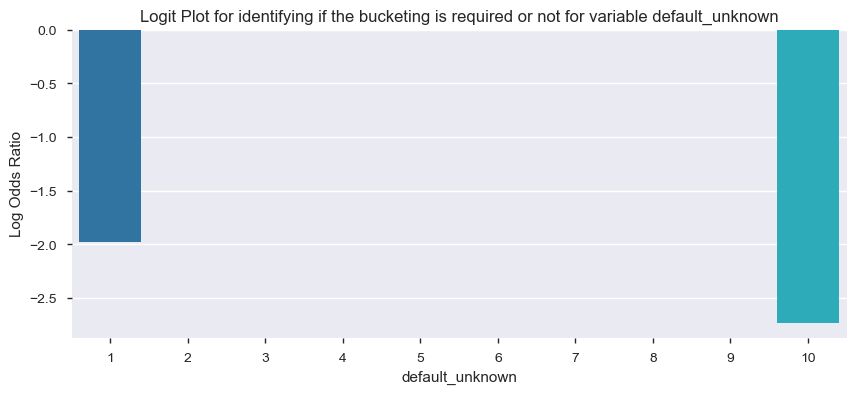

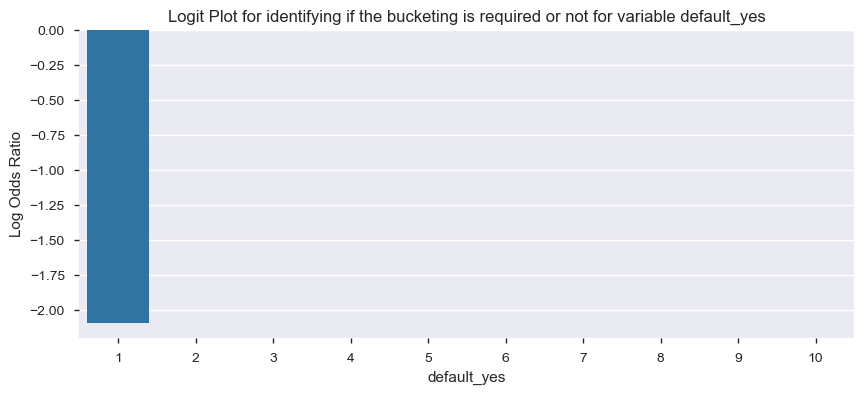

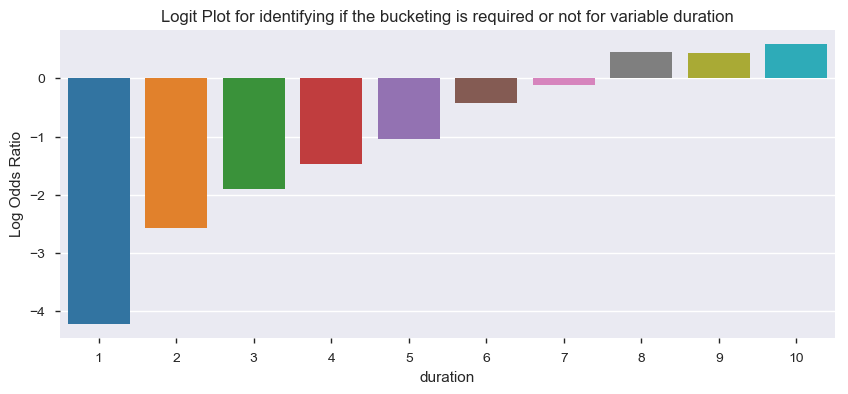

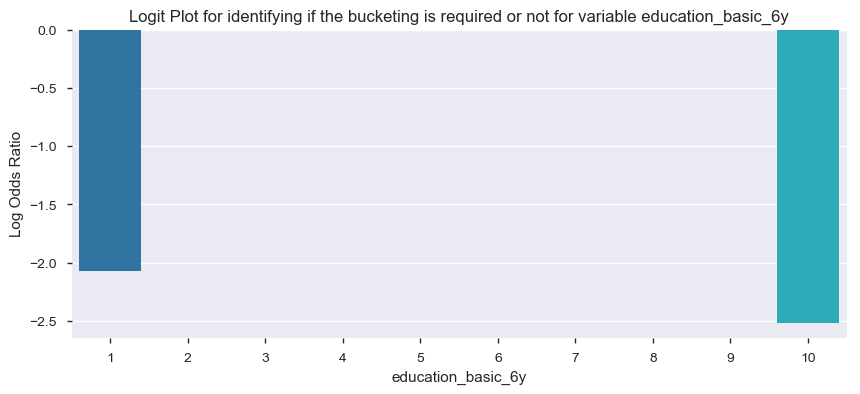

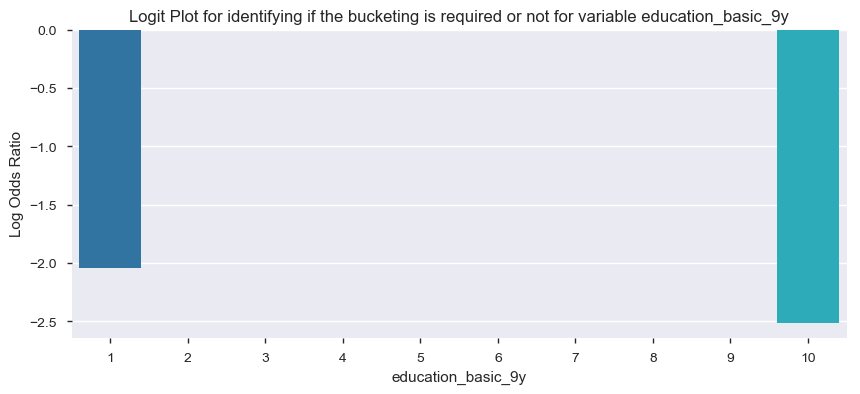

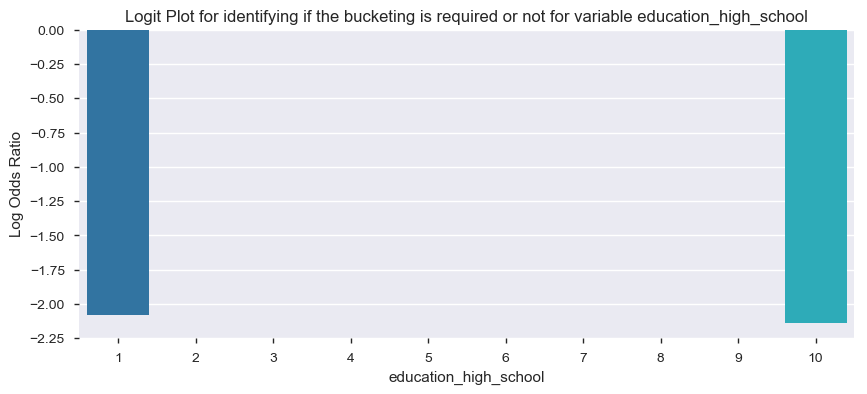

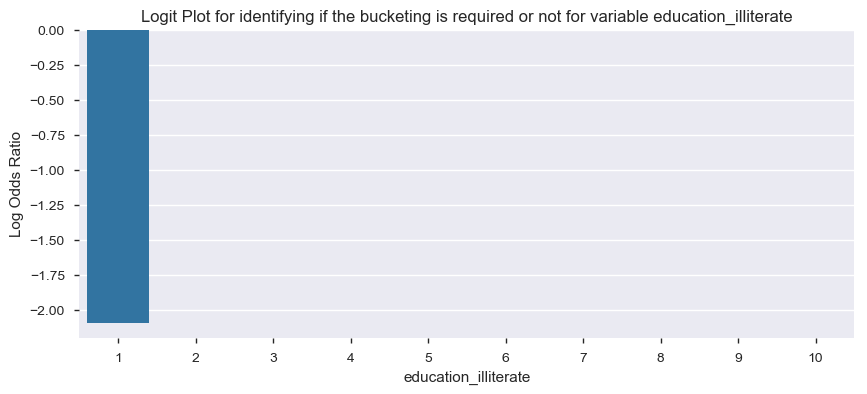

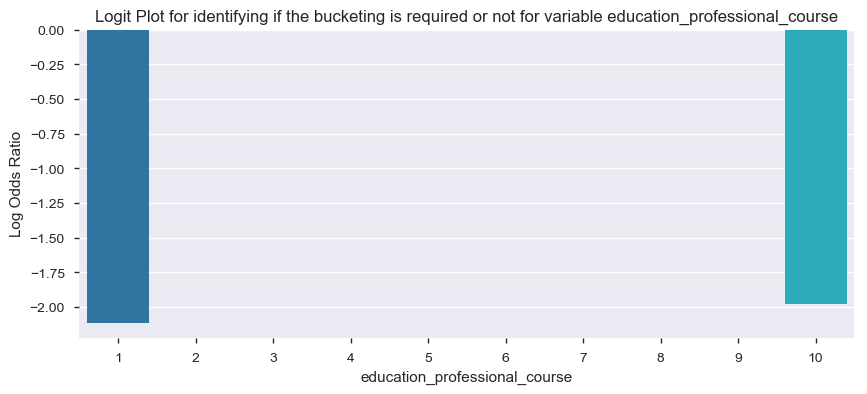

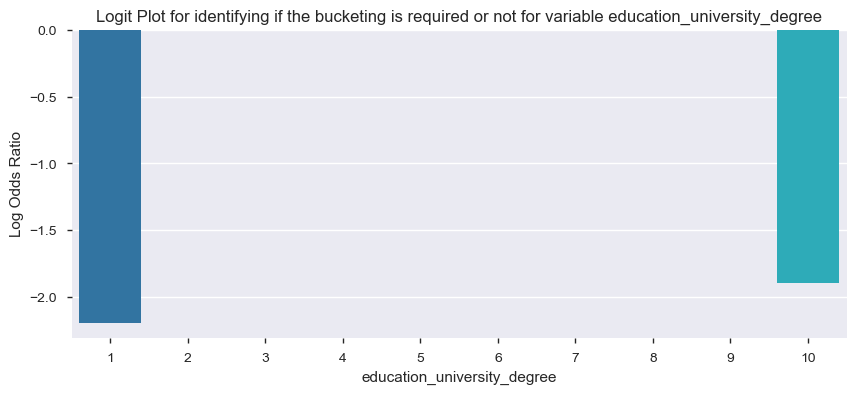

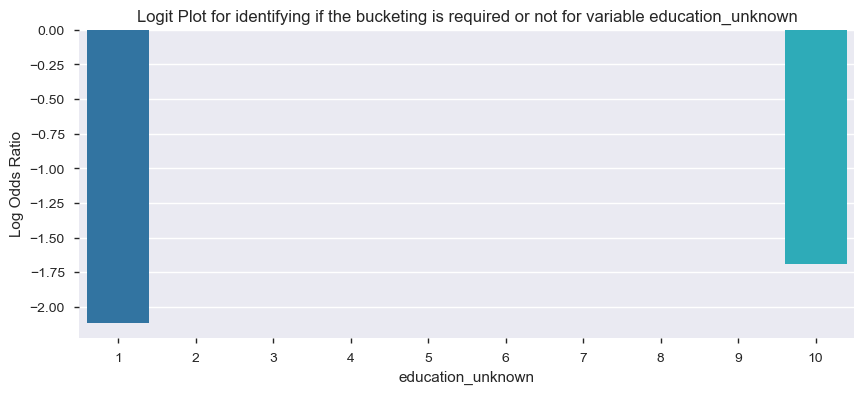

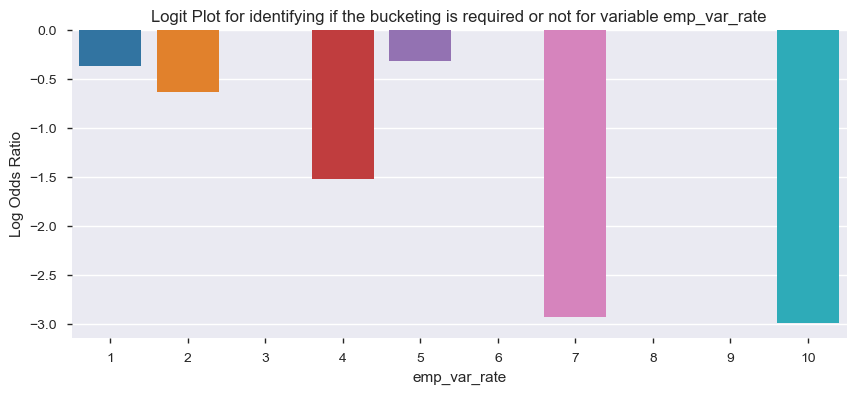

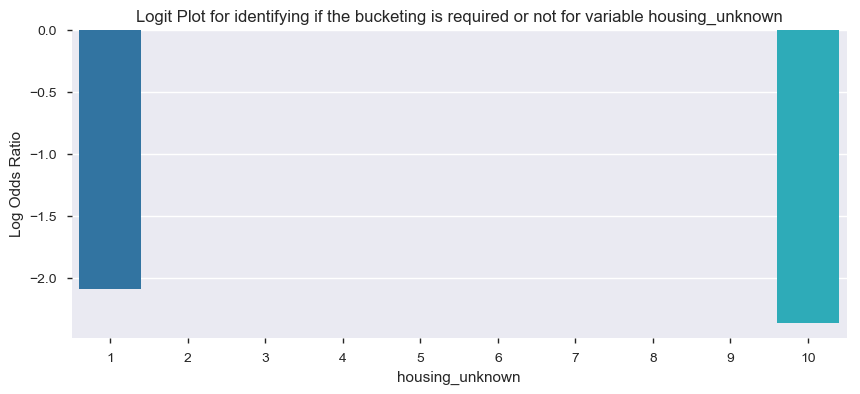

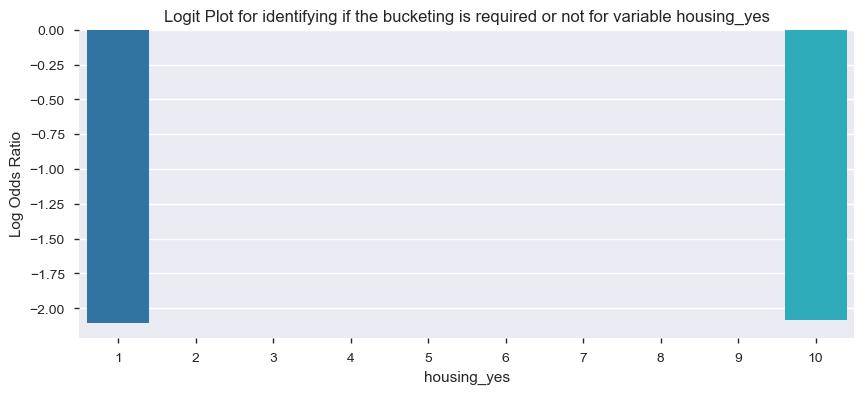

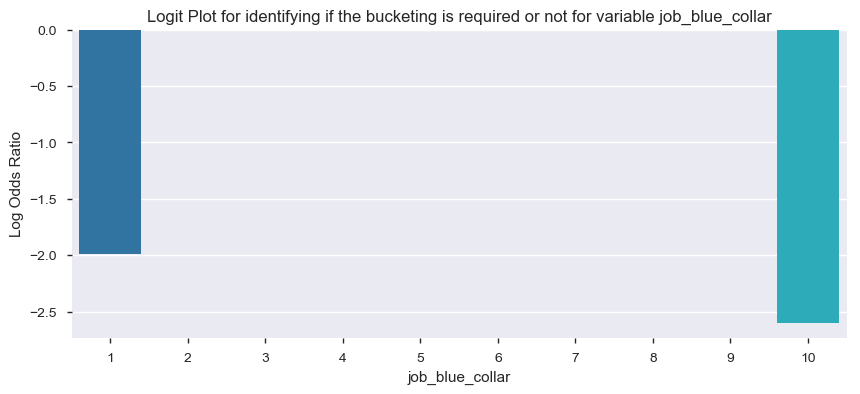

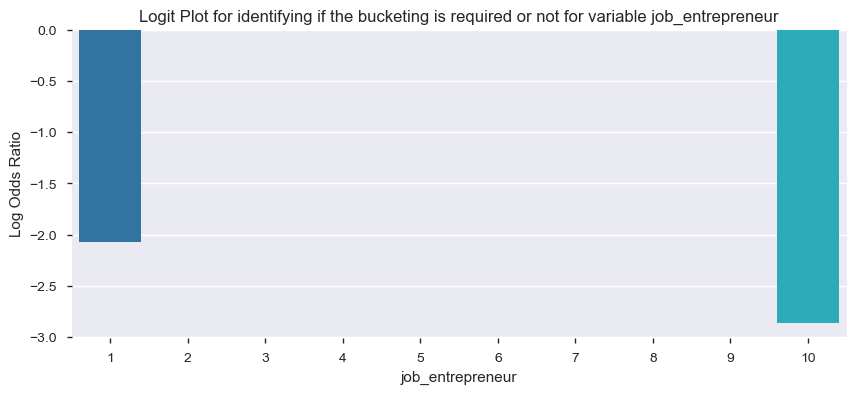

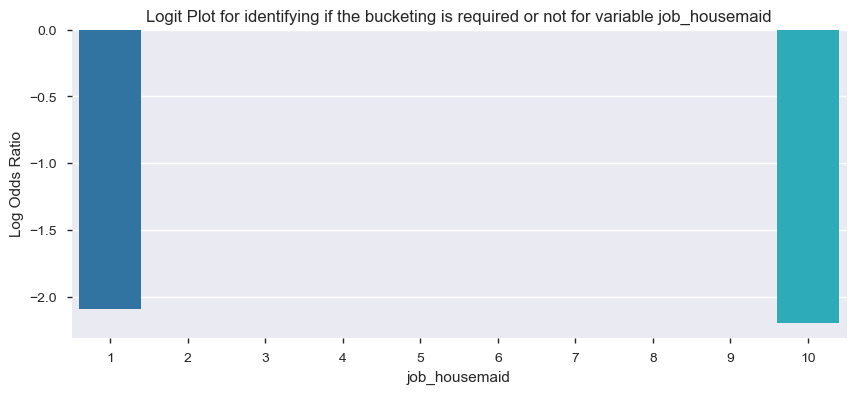

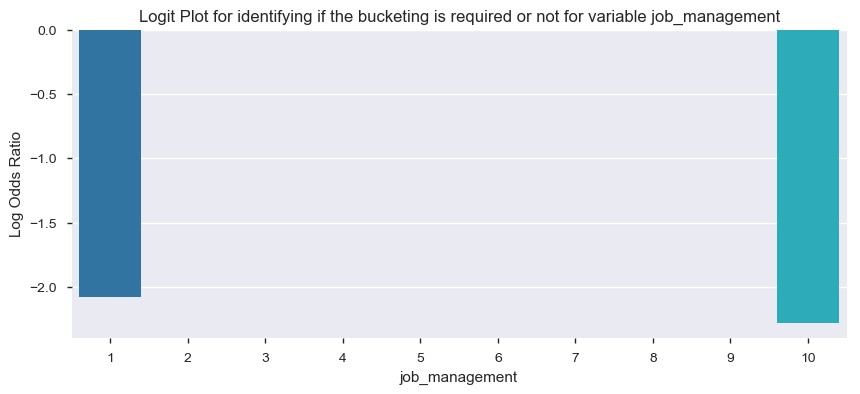

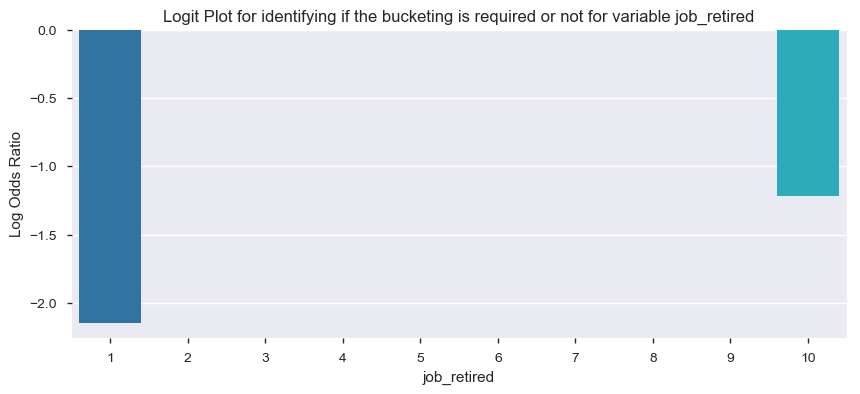

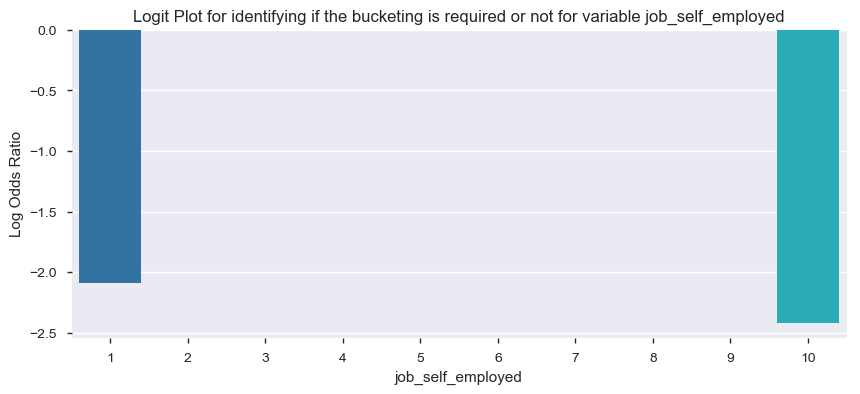

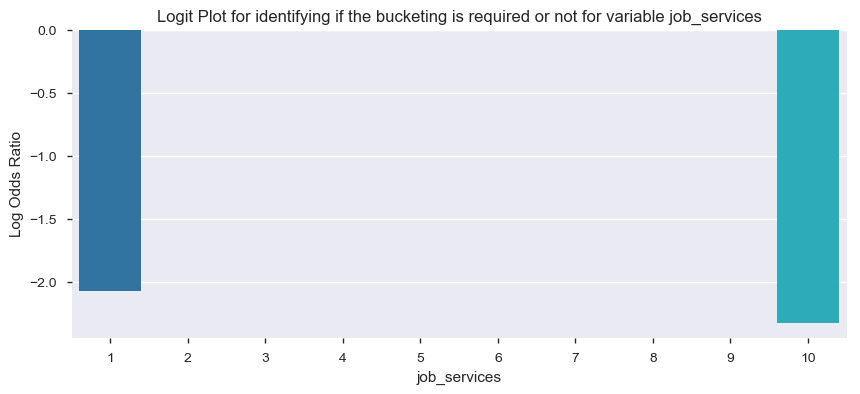

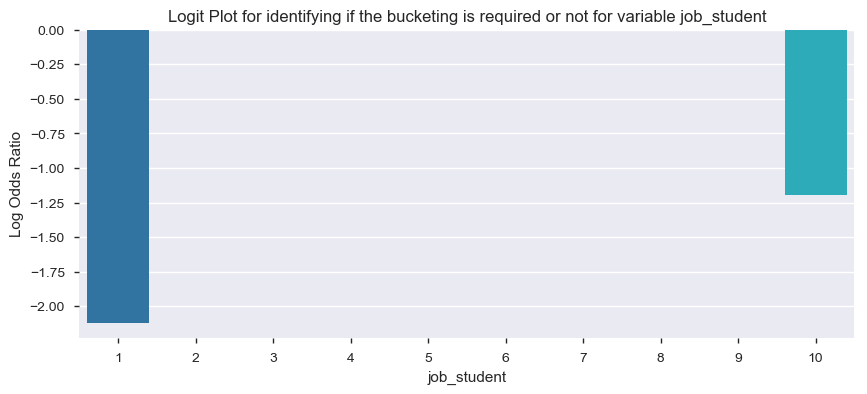

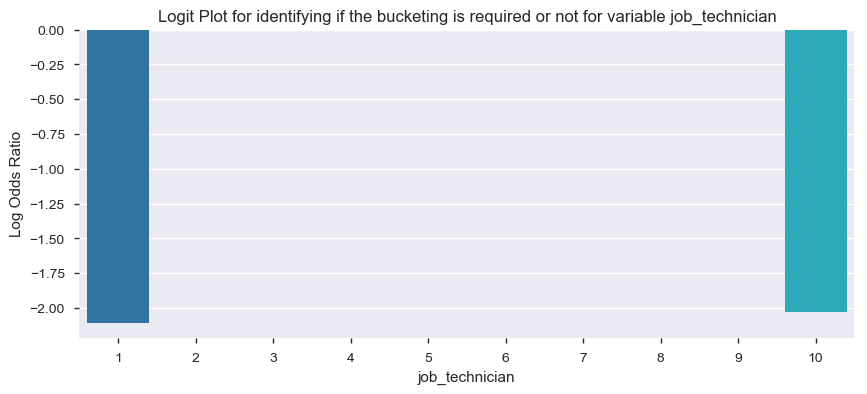

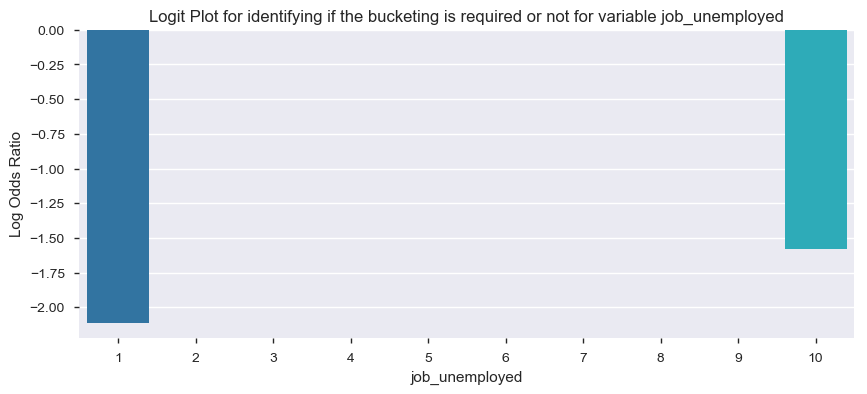

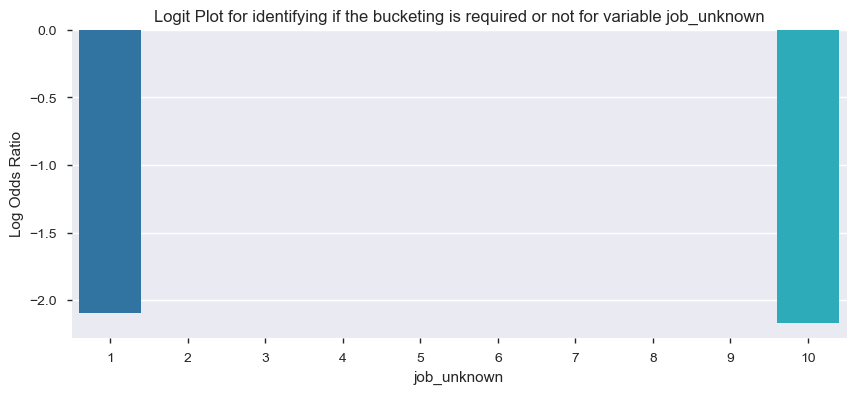

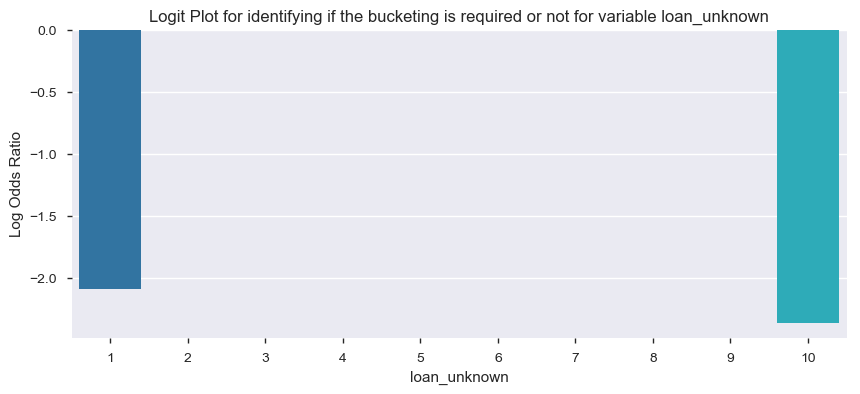

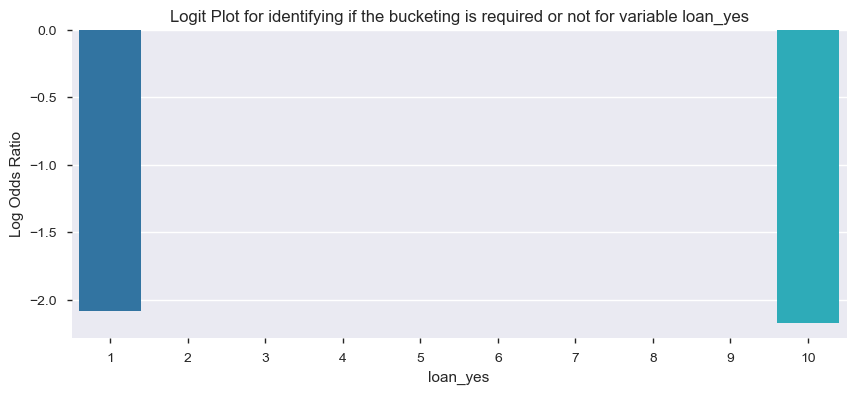

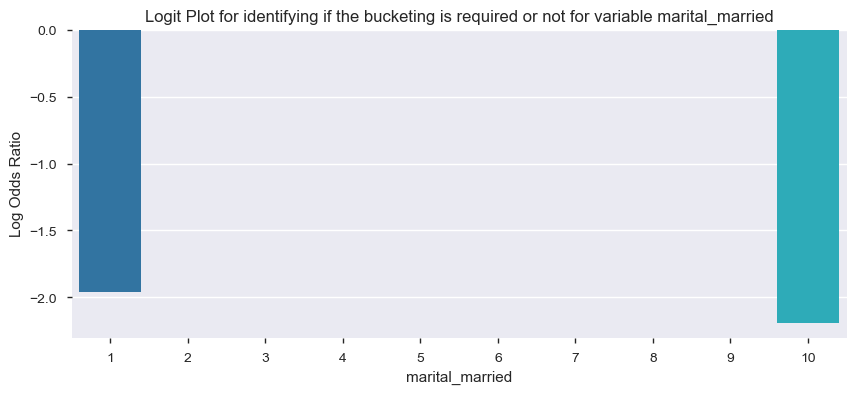

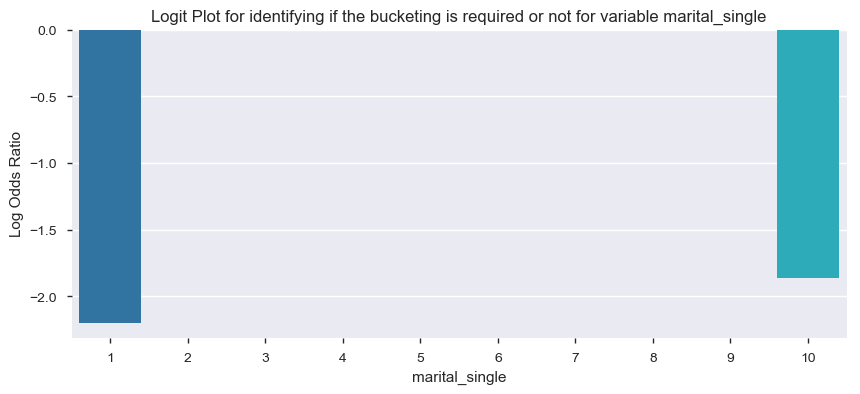

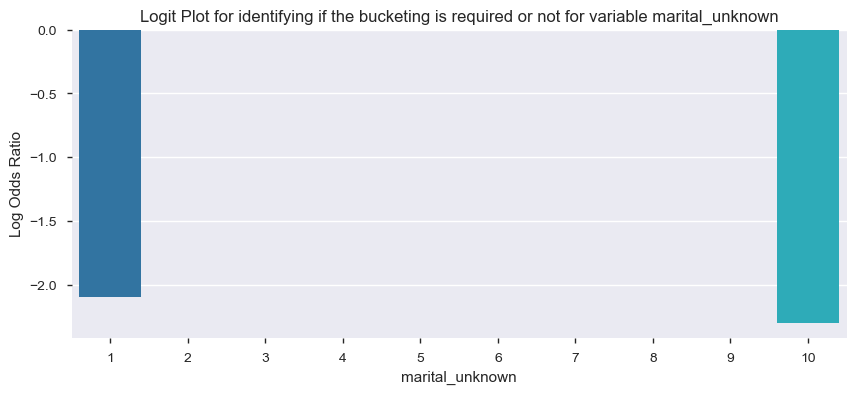

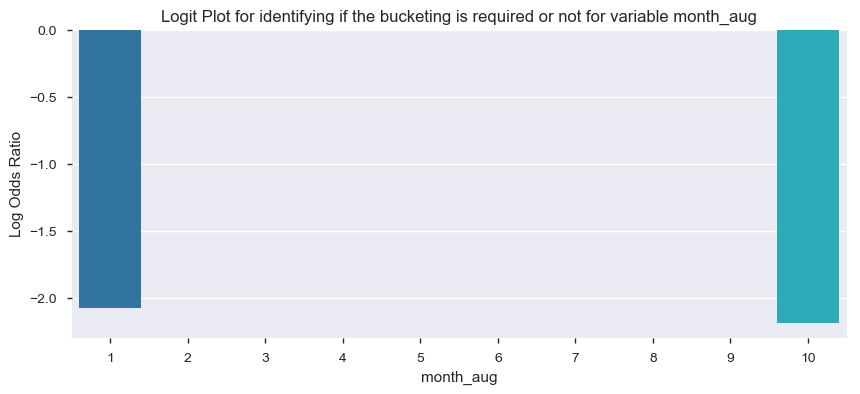

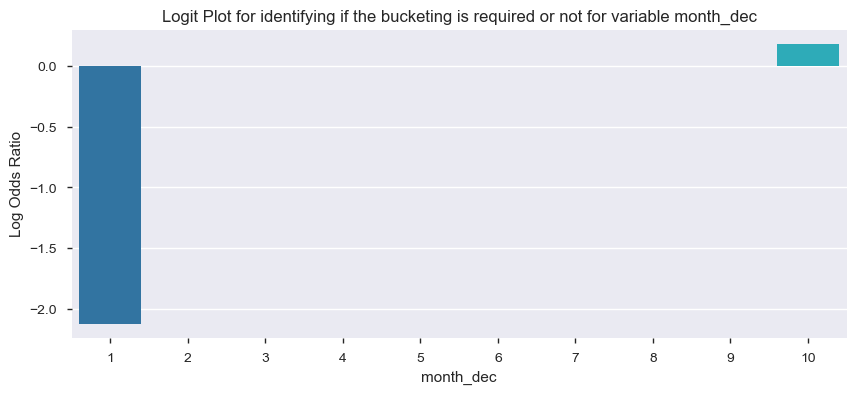

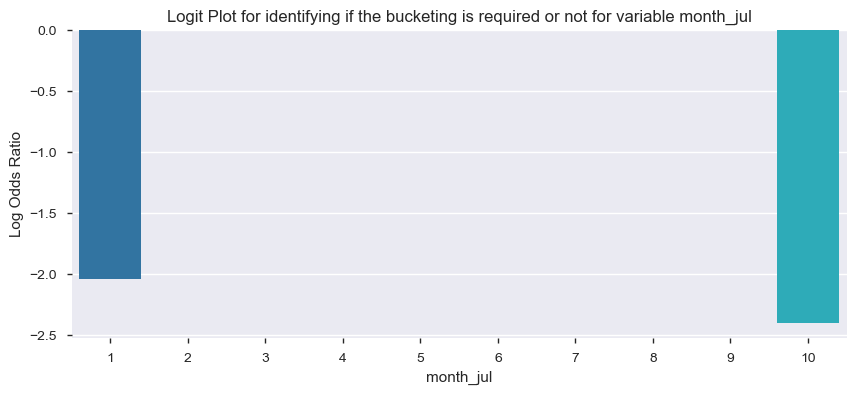

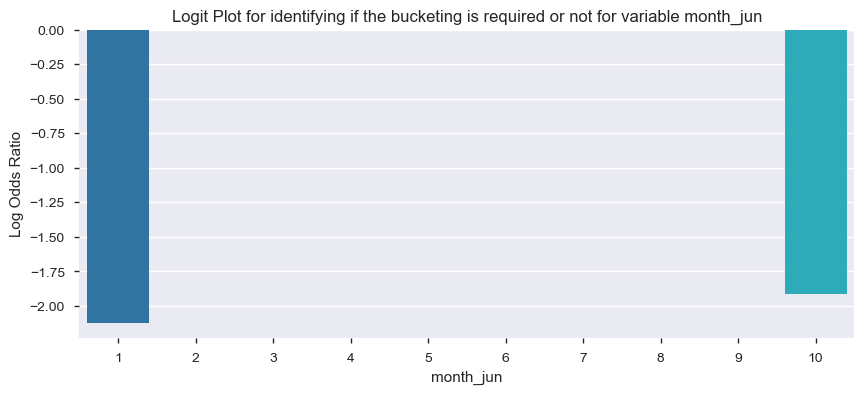

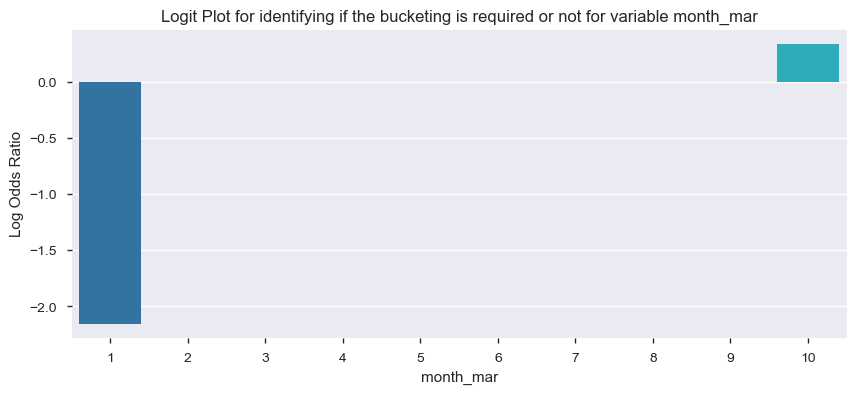

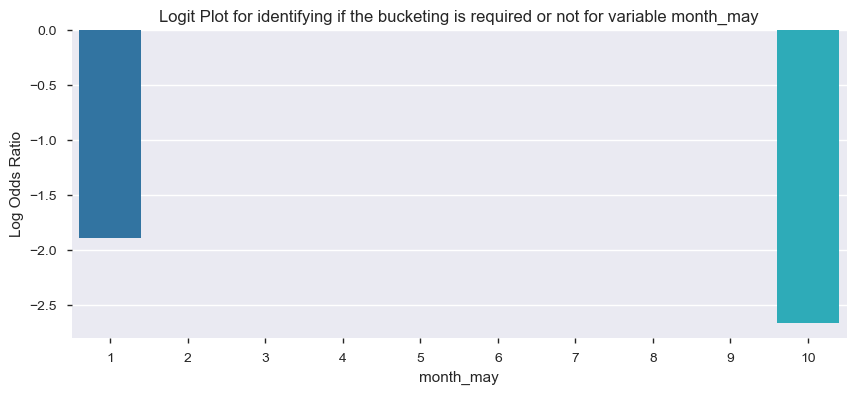

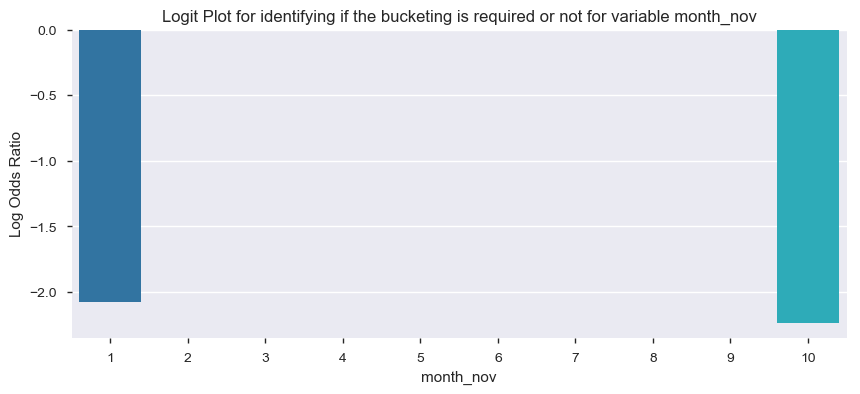

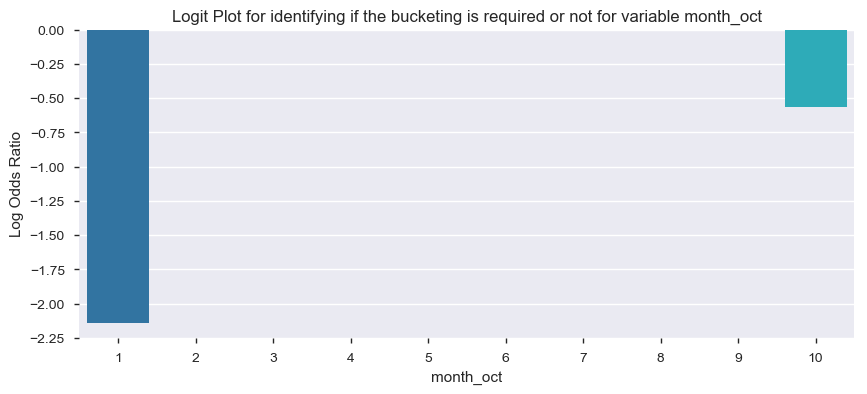

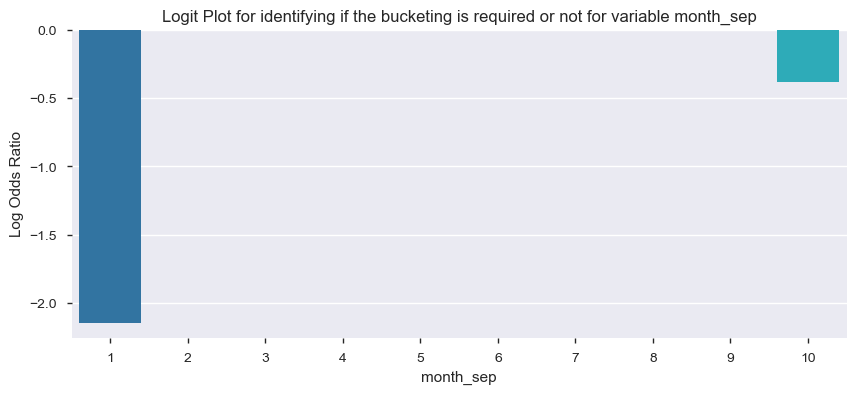

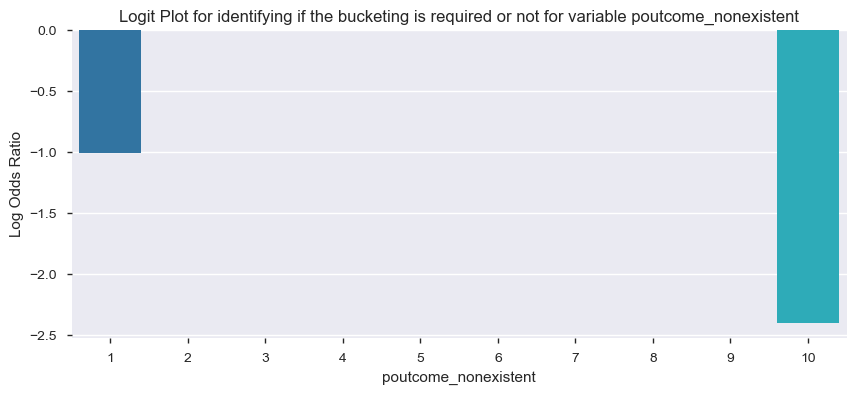

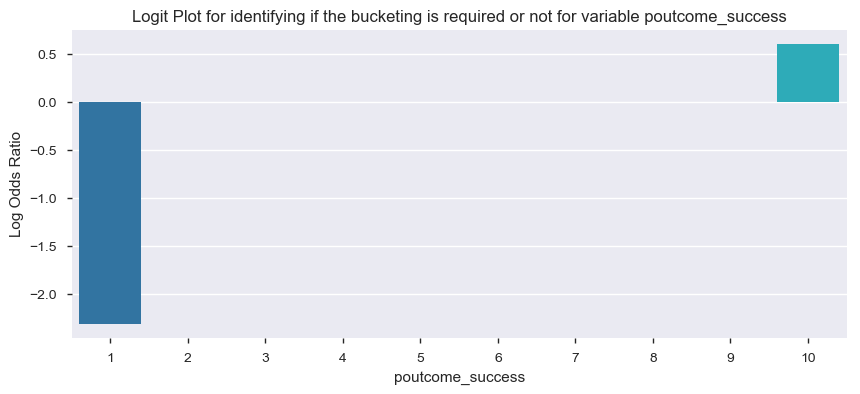

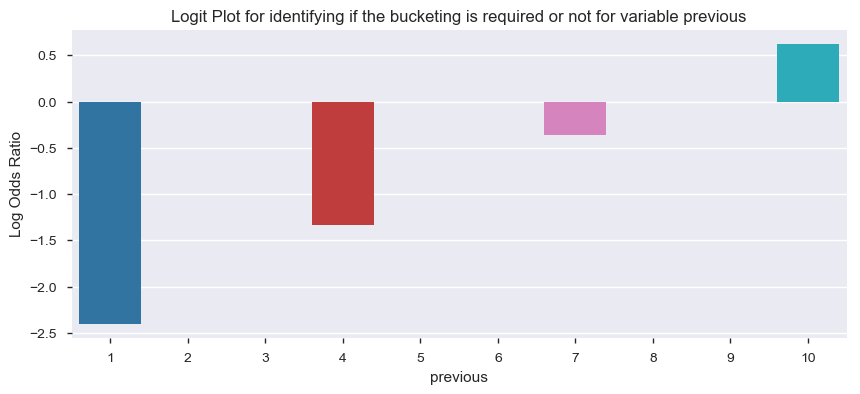

In [37]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in data_new.columns.difference(['y_yes']):
    binned = pd.cut(data_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_new.groupby(binned)['y_yes'].sum() / (data_new.groupby(binned)['y_yes'].count()-data_new.groupby(binned)['y_yes'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

#### Variable Reduction using univariate Regression (short list based on Somer's D values)

In [38]:
somersd_df = pd.DataFrame()
for num_variable in data_new.columns.difference(['y_yes']):
    logreg = sm.logit(formula = str('y_yes ~ ')+str(num_variable), data=data_new)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(data_new['y_yes'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.344178
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.341558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.334952
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345447
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345451
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345421
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345425
  

In [39]:
somersd_df.sort_values('SomersD', ascending=False, inplace=True)

In [40]:
somersd_df

,Variable Name,SomersD
0,duration,0.643265
0,emp_var_rate,0.412654
0,previous,0.243887
0,poutcome_nonexistent,0.233411
0,contact_telephone,0.210711
0,poutcome_success,0.19036
0,month_may,0.151588
0,campaign,0.107061
0,default_unknown,0.0969142
0,job_blue_collar,0.089118


In [41]:
somersd_df.to_csv('Univariate Regression Results.csv')

#### Variable Reduction using Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [42]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_new[data_new.columns.difference(['y_yes'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, data_new[['y_yes']] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be cha

[False False False  True False False False False False False False False
 False False False False False False  True False False False  True False
  True False  True False False False False False False False False False
 False False  True False  True  True  True  True  True  True  True  True
  True]
[35 19 30  1 33 31 25 12 22 21 34 26 16 14  8 24 27  7  1  5 10  2  1 20
  1 11  1  4 17 23 15  3  9 13 29 28 18  6  1 32  1  1  1  1  1  1  1  1
  1]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [43]:
X.columns

Index(['age', 'campaign', 'cons_conf_idx', 'contact_telephone',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'default_unknown', 'default_yes', 'duration',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'emp_var_rate',
       'housing_unknown', 'housing_yes', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'loan_unknown', 'loan_yes', 'marital_married',
       'marital_single', 'marital_unknown', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success',
       'previous'],
      dtype='object')

In [44]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [45]:
RFE_features

Index(['contact_telephone', 'emp_var_rate', 'job_entrepreneur',
       'job_management', 'job_self_employed', 'month_dec', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'previous'],
      dtype='object')

#### Variable reduction using Select K-Best technique

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [47]:
X = data_new[data_new.columns.difference(['y_yes'])]
X_new = SelectKBest(f_classif, k=15).fit(X, data_new[['y_yes']] )

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
X_new.get_support()

array([False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True])

In [49]:
X_new.scores_

array([1.07452158e+01, 2.60174872e+01, 1.27264162e+01, 7.92202598e+01,
       2.90790761e-01, 5.08043133e-02, 1.79734348e-02, 2.61662472e-01,
       2.41642189e+01, 1.22929101e-01, 9.48321863e+02, 3.02118686e+00,
       8.19143521e+00, 2.11695352e-01, 1.22929101e-01, 9.08239458e-01,
       8.29635540e+00, 3.81126579e+00, 3.59027148e+02, 6.24594778e-01,
       3.43116164e-02, 1.90016167e+01, 4.84233138e+00, 1.04398956e-01,
       1.02985002e+00, 2.54443945e+01, 1.30421018e+00, 1.86043410e+00,
       1.28503269e+01, 3.35875260e-01, 4.45340354e+00, 1.93750397e-02,
       6.24594778e-01, 4.25808863e-01, 5.40132618e+00, 1.02344446e+01,
       3.90463264e-02, 6.05832744e-01, 4.35494114e+01, 6.20055347e+00,
       2.20718450e+00, 1.14899459e+02, 4.18556370e+01, 8.77370743e-01,
       4.65023507e+01, 5.95369089e+01, 1.84639707e+02, 4.88908229e+02,
       2.84381849e+02])

In [50]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [51]:
KBest_features

Index(['campaign', 'contact_telephone', 'default_unknown', 'duration',
       'emp_var_rate', 'job_blue_collar', 'job_retired', 'month_dec',
       'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'previous'],
      dtype='object')

#### Variance Inflation Factor assessment

In [52]:
X = pd.concat([data_new[data_new.columns.difference(['y_yes'])],data_new['y_yes']], axis=1)
features = "+".join(data_new.columns.difference(['y_yes']))
X.head()

,age,campaign,cons_conf_idx,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_unknown,default_yes,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,previous,y_yes
0,30.0,2.0,-46.2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.0,0
1,39.0,4.0,-36.4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.0,0
2,25.0,1.0,-41.8,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0.0,0
3,38.0,3.0,-41.8,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.0,0
4,47.0,1.0,-42.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.0,0


In [53]:
features

'age+campaign+cons_conf_idx+contact_telephone+day_of_week_mon+day_of_week_thu+day_of_week_tue+day_of_week_wed+default_unknown+default_yes+duration+education_basic_6y+education_basic_9y+education_high_school+education_illiterate+education_professional_course+education_university_degree+education_unknown+emp_var_rate+housing_unknown+housing_yes+job_blue_collar+job_entrepreneur+job_housemaid+job_management+job_retired+job_self_employed+job_services+job_student+job_technician+job_unemployed+job_unknown+loan_unknown+loan_yes+marital_married+marital_single+marital_unknown+month_aug+month_dec+month_jul+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+poutcome_nonexistent+poutcome_success+previous'

In [54]:
a,b = dmatrices(formula_like='y_yes ~ '+ 'campaign+cons_conf_idx+contact_telephone+default_unknown+default_yes+duration+emp_var_rate+job_blue_collar+job_entrepreneur+job_management+job_retired+job_self_employed+job_student+month_dec+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+poutcome_success+previous', data = data_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor           features
0   112.264434          Intercept
1     1.057210           campaign
2     1.363093      cons_conf_idx
3     2.427855  contact_telephone
4     1.083696    default_unknown
5     1.003453        default_yes
6     1.016303           duration
7     2.035384       emp_var_rate
8     1.150884    job_blue_collar
9     1.039269   job_entrepreneur
10    1.059271     job_management
11    1.062026        job_retired
12    1.030559  job_self_employed
13    1.041657        job_student
14    1.079856          month_dec
15    1.881421          month_jun
16    1.075128          month_mar
17    2.216336          month_may
18    1.256311          month_nov
19    1.211377          month_oct
20    1.176324          month_sep
21    1.416038   poutcome_success
22    1.613470           previous


### Final list of variable selected for the model building from above steps

campaign, 
cons_conf_idx, 
contact_telephone, 
default_unknown,
default_yes,
duration,
emp_var_rate,
job_blue_collar,
job_entrepreneur,
job_management,
job_retired,
job_self_employed,
job_student,
month_dec,
month_jun,
month_mar,
month_may,
month_nov,
month_oct,
month_sep,
poutcome_success,
previous,


### Model Building

In [55]:
#for logistic regression using statsmodels
train, test = train_test_split(data_new, test_size=0.3, random_state=0)

In [58]:
'''
list_vars = list(RFE_features)

all_columns = "+".join(list_vars)
my_formula = "y_yes~" + all_columns

print(my_formula)
'''

'\nlist_vars = list(RFE_features)\n\nall_columns = "+".join(list_vars)\nmy_formula = "y_yes~" + all_columns\n\nprint(my_formula)\n'

### Building logistic Regression

In [56]:
import statsmodels.formula.api as sm
import sklearn.metrics as metrics

In [57]:
logreg = sm.logit(formula='y_yes~campaign+cons_conf_idx+contact_telephone+duration+emp_var_rate+job_blue_collar+job_entrepreneur+job_management+job_retired+job_self_employed+job_student+month_dec+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+poutcome_success+previous', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.187058
         Iterations 8


In [58]:
print(result.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.473      
Dependent Variable: y_yes            AIC:              1120.5783  
Date:               2019-04-21 16:25 BIC:              1245.8766  
No. Observations:   2883             Log-Likelihood:   -539.29    
Df Model:           20               LL-Null:          -1023.6    
Df Residuals:       2862             LLR p-value:      1.9592e-192
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          -2.4205   0.7155 -3.3828 0.0007 -3.8230 -1.0181
campaign           -0.0781   0.0536 -1.4568 0.1452 -0.1832  0.0270
cons_conf_idx       0.0465   0.0169  2.7514 0.0059  0.0134  0.0797
contact_telephone  -0

In [59]:
logreg = sm.logit(formula='y_yes~cons_conf_idx+contact_telephone+duration+emp_var_rate+job_self_employed+month_jun+month_mar+month_may+month_nov+poutcome_success+previous', data=train)
result = logreg.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.189120
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.467      
Dependent Variable: y_yes            AIC:              1114.4674  
Date:               2019-04-21 16:25 BIC:              1186.0664  
No. Observations:   2883             Log-Likelihood:   -545.23    
Df Model:           11               LL-Null:          -1023.6    
Df Residuals:       2871             LLR p-value:      4.0137e-198
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -2.0412   0.6562  -3.1107 0.0019 -3.3274 -0.7551
cons_conf_idx      0.0593   0.0160   3.7052 0.0002  0

### Accuracy Metrics

In [60]:
train_gini = 2*metrics.roc_auc_score(train['y_yes'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['y_yes'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['y_yes'], result.predict(train))
test_auc = metrics.roc_auc_score(test['y_yes'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.8885436278511802
The Gini Index for the model built on the Test Data is :  0.8173249551166968
The AUC for the model built on the Train Data is :  0.9442718139255901
The AUC for the model built on the Test Data is :  0.9086624775583484


In [61]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['y_yes']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
4070,0,0.009942
1240,0,0.009801
349,0,0.005759
3706,0,0.019382
4043,0,0.006265


In [62]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['y_yes']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
3754,0,0.007338
45,0,0.112076
2774,0,0.052020
1170,0,0.078342
4042,0,0.025989


In [63]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [64]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.114117
0,0.020408,0.993921,0.586922,0.633368
0,0.040816,0.975684,0.746672,0.772806
0,0.061224,0.951368,0.797964,0.815470
0,0.081633,0.911854,0.829287,0.838710
0,0.102041,0.899696,0.855129,0.860215
0,0.122449,0.878419,0.870791,0.871661
0,0.142857,0.860182,0.882537,0.879986
0,0.163265,0.851064,0.898590,0.893167
0,0.183673,0.817629,0.907204,0.896982


In [65]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [66]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.114117,1.000000
0,0.020408,0.993921,0.586922,0.633368,1.580843
0,0.040816,0.975684,0.746672,0.772806,1.722356
0,0.061224,0.951368,0.797964,0.815470,1.749332
0,0.081633,0.911854,0.829287,0.838710,1.741141


In [67]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.102041,0.899696,0.855129,0.860215,1.754825


In [68]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.428571,0.56535,0.966327,0.920569,1.531677


In [69]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.114117,1.0


In [71]:
#Choosen Best Cut-off is 0.23 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.1020 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.1020 else 0)

In [72]:
train_predict.head()

,actual,prob,predicted
4070,0,0.009942,0
1240,0,0.009801,0
349,0,0.005759,0
3706,0,0.019382,0
4043,0,0.006265,0


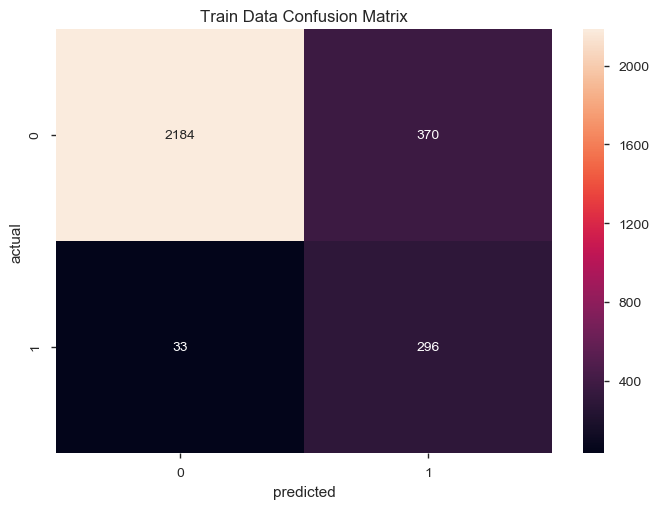

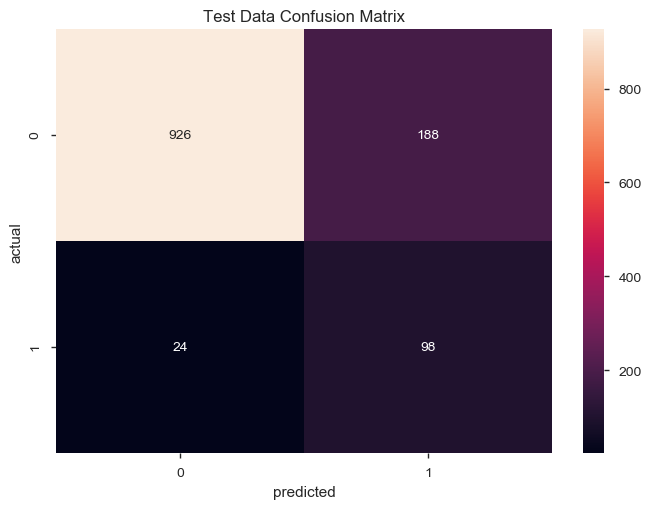

In [73]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [74]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.8602150537634409
The overall accuracy score for the Test Data  is :  0.8284789644012945


In [75]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2554
           1       0.44      0.90      0.59       329

   micro avg       0.86      0.86      0.86      2883
   macro avg       0.71      0.88      0.76      2883
weighted avg       0.92      0.86      0.88      2883



In [76]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1114
           1       0.34      0.80      0.48       122

   micro avg       0.83      0.83      0.83      1236
   macro avg       0.66      0.82      0.69      1236
weighted avg       0.91      0.83      0.86      1236



In [77]:
### Decile Analysis

#Decile analysis
#Top-two deciles - High risk customers - will reject applications
#3rd,4th, 5th deciesl - medium risk customers - will accept application with proper scrutin
#6th decile onwards - low risk customers - accept the applications


#Decile analysis for validation of models - Business validation

In [78]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

train_predict.head()

,actual,prob,predicted,Deciles
4070,0,0.009942,0,2
1240,0,0.009801,0,2
349,0,0.005759,0,1
3706,0,0.019382,0,5
4043,0,0.006265,0,1


In [79]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

,actual,prob,predicted,Deciles
3754,0,0.007338,0,2
45,0,0.112076,1,7
2774,0,0.052020,0,6
1170,0,0.078342,0,7
4042,0,0.025989,0,5


In [80]:
# Decile Analysis for train data

no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [81]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.998861,0.395591,189,100,289
8,0.394798,0.146594,92,196,288
7,0.144888,0.055165,36,252,288
6,0.054922,0.028528,7,281,288
5,0.028468,0.018723,3,285,288
4,0.018677,0.013422,1,288,289
3,0.013388,0.010158,1,279,280
2,0.010133,0.007247,0,295,295
1,0.007229,0.004284,0,288,288


In [82]:
# Decile Analysis for train data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.997773,0.344048,60,64,124
8,0.343355,0.148597,33,90,123
7,0.145689,0.054345,19,105,124
6,0.054102,0.029909,7,116,123
5,0.029843,0.019501,1,123,124
4,0.019498,0.013257,2,121,123
3,0.013224,0.009621,0,124,124
2,0.009584,0.006638,0,122,122
1,0.006636,0.003781,0,125,125


In [83]:
Decile_analysis_train.to_csv('Decile_analysis_train.csv')

Decile_analysis_test.to_csv('Decile_analysis_test.csv')

#Exercise
#you need to come up with the similar metrics for train & test as per the template
# you need to compare Bad rate, lift, KS, Rank ordering for train & test decile analysis

### For logistic regression using sklearn (Optional)

In [84]:
X = selected_features_from_KBest
y = data_new[['y_yes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [85]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.915


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model

The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

In [86]:
results

array([0.93425606, 0.89965398, 0.92041522, 0.88888889, 0.92361111,
       0.93402778, 0.89583333, 0.92708333, 0.92361111, 0.90625   ])

In [87]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
logreg = LogisticRegression()
results =logreg.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = results.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1072   42]
 [  75   47]]


In [89]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1114
           1       0.53      0.39      0.45       122

   micro avg       0.91      0.91      0.91      1236
   macro avg       0.73      0.67      0.70      1236
weighted avg       0.89      0.91      0.90      1236



Interpretation: Of the entire test set, 89% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 91% of the customer’s preferred term deposits that were promoted.

In [90]:
logreg.predict_proba(X_test)[:,1]

array([0.00617107, 0.13201635, 0.04142456, ..., 0.29988079, 0.01436075,
       0.90690672])

### Prediction using Decision Trees

In [91]:
from sklearn.model_selection import train_test_split

X = selected_features_from_KBest
y = data_new['y_yes']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
### Building Decision Tree Model
import sklearn.tree as dt
dir(dt)

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_criterion',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'tree']

In [93]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [94]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree=clf_tree.fit( train_X, train_y )

In [95]:
pd.DataFrame(clf_tree.predict_proba(train_X)).head()

,0,1
0,0.854902,0.145098
1,0.989813,0.010187
2,0.464286,0.535714
3,0.989813,0.010187
4,0.989813,0.010187


In [96]:
pd.DataFrame(clf_tree.predict_proba(train_X))[1]

0       0.145098
1       0.010187
2       0.535714
3       0.010187
4       0.010187
5       0.145098
6       0.010187
7       0.010187
8       0.010187
9       0.010187
10      0.145098
11      0.535714
12      0.145098
13      0.010187
14      0.010187
15      0.010187
16      0.145098
17      0.145098
18      0.145098
19      0.010187
20      0.010187
21      0.010187
22      0.431373
23      0.010187
24      0.145098
25      0.145098
26      0.145098
27      0.145098
28      0.339450
29      0.010187
          ...   
2853    0.010187
2854    0.010187
2855    0.010187
2856    0.010187
2857    0.010187
2858    0.010187
2859    0.010187
2860    0.010187
2861    0.145098
2862    0.145098
2863    0.145098
2864    0.145098
2865    0.010187
2866    0.010187
2867    0.010187
2868    0.010187
2869    0.010187
2870    0.145098
2871    0.795455
2872    0.010187
2873    0.010187
2874    0.777778
2875    0.010187
2876    0.145098
2877    0.145098
2878    0.010187
2879    0.010187
2880    0.0101

In [97]:
pred = pd.DataFrame(clf_tree.predict( train_X ), index=train_X.index)

In [98]:
tree_train_pred = pd.concat([train_y, pred], axis=1)

In [99]:
tree_train_pred.columns = ['actual', 'predicted']

In [100]:
tree_train_pred.head()

,actual,predicted
926,0,0
3855,0,0
997,1,1
3128,0,0
1953,0,0


In [101]:
pred_test = pd.DataFrame(clf_tree.predict( test_X ), index=test_X.index)
tree_test_pred = pd.concat([test_y, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

,actual,predicted
889,1,0
2669,0,0
2707,0,0
2258,0,0
2514,1,0


In [102]:
print("Train Accuracy:")
print(metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted ))

print("Test Accuracy:")
print(metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted ))

Train Accuracy:
0.9143253555324315
Test Accuracy:
0.8980582524271845


In [103]:
import seaborn as sn

Text(0.5,28.3611,'Predicted label')

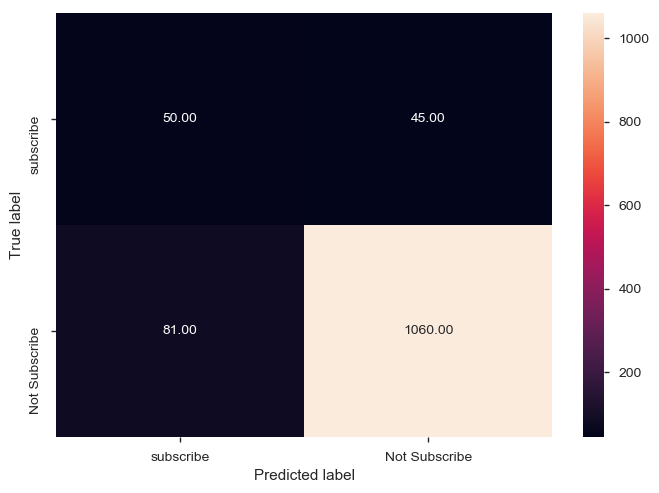

In [104]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["subscribe", "Not Subscribe"] , yticklabels = ["subscribe", "Not Subscribe"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [105]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( train_X ) )

predict_proba_df.columns= ['P_no', 'P_yes']

predict_proba_df.head()

,P_no,P_yes
0,0.854902,0.145098
1,0.989813,0.010187
2,0.464286,0.535714
3,0.989813,0.010187
4,0.989813,0.010187


In [106]:
metrics.roc_auc_score(train_y,predict_proba_df.P_yes )

0.8859704204057745

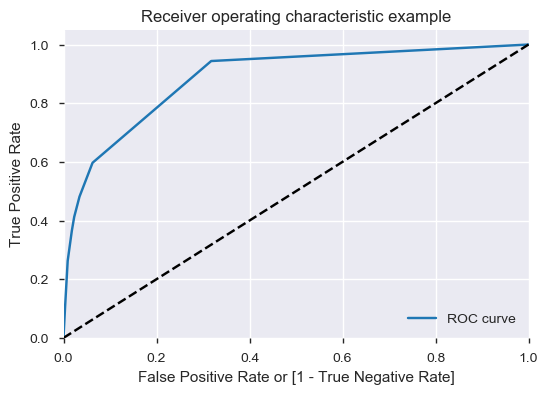

In [107]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( train_y,
                                     predict_proba_df.P_yes,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve' )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Fine Tuning the parameters

In [108]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [109]:
clf_tree = DecisionTreeClassifier(max_depth = 5, max_features=10)

In [110]:
clf_tree.fit(train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4]), 'max_features': array([3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
tree.best_score_

0.8966354491848768

In [113]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [114]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

In [115]:
train_pred = tree.predict(train_X)

In [116]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2563
           1       0.66      0.32      0.43       320

   micro avg       0.91      0.91      0.91      2883
   macro avg       0.79      0.65      0.69      2883
weighted avg       0.89      0.91      0.89      2883



In [117]:
test_pred = tree.predict(test_X)

In [118]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1105
           1       0.46      0.29      0.36       131

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.69      0.63      0.65      1236
weighted avg       0.87      0.89      0.88      1236



### Building Final Decision Tree Model

In [119]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=3, max_leaf_nodes=5 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=3, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Feature Relative Importance

In [120]:
clf_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.23586981, 0.25642775,
       0.        , 0.        , 0.        , 0.        , 0.18547965,
       0.        , 0.        , 0.32222279, 0.        , 0.        ])

In [121]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, clf_tree.feature_importances_)]

feature_map

[('campaign', 0.0),
 ('contact_telephone', 0.0),
 ('default_unknown', 0.0),
 ('duration', 0.23586980791675705),
 ('emp_var_rate', 0.2564277516208643),
 ('job_blue_collar', 0.0),
 ('job_retired', 0.0),
 ('month_dec', 0.0),
 ('month_mar', 0.0),
 ('month_may', 0.18547964867814742),
 ('month_oct', 0.0),
 ('month_sep', 0.0),
 ('poutcome_nonexistent', 0.3222227917842314),
 ('poutcome_success', 0.0),
 ('previous', 0.0)]

In [123]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
12,poutcome_nonexistent,0.322223
4,emp_var_rate,0.256428
3,duration,0.235870
9,month_may,0.185480
0,campaign,0.000000
1,contact_telephone,0.000000
2,default_unknown,0.000000
5,job_blue_collar,0.000000
6,job_retired,0.000000
7,month_dec,0.000000


In [124]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [125]:
tree_test_pred.sample( n = 10 )

,actual,predicted
2350,0,0
3106,1,0
3246,0,0
2249,0,0
605,0,0
383,0,0
1018,0,0
1506,0,0
2345,0,0
1647,0,0


In [126]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8883495145631068

Text(0.5,28.3611,'Predicted label')

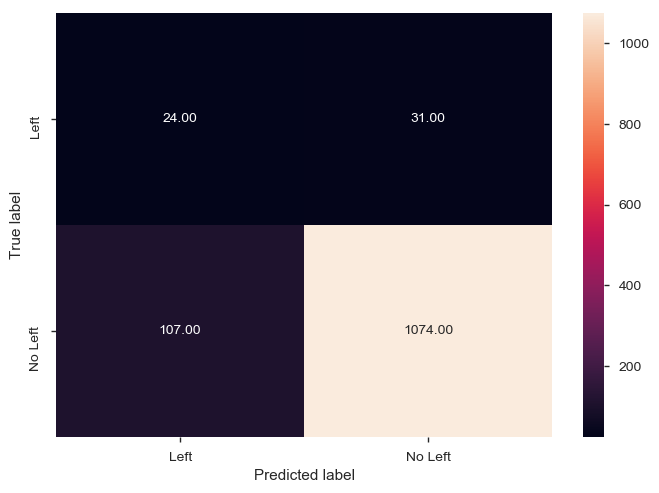

In [127]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Generate Rules from Decision Trees

#### To create a decision tree visualization graph.
- Install GraphViz (As per the OS and version you are using)
- pip install pydotplus
- Add the path to environmental variables
- Note: The notebook needs a restart.

In [128]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [129]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "bank_tree.odt",
              feature_names = train_X.columns )

In [130]:
# Converting open document file to jpg imanage

import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'bank_tree.odt' )

In [131]:
chd_tree_graph.write_jpg( 'bank_tree.jpg' )

True

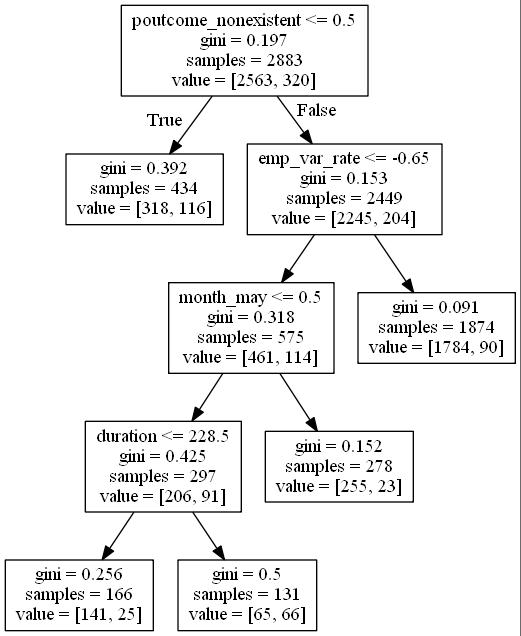

In [132]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='bank_tree.jpg')

---
# Model $Ensembles$


> Ensemble methods combine multiple classifiers (using _model averaging_ or _voting_) which may differ in algorithms, input features, or input samples. Statistical analyses showed that ensemble methods yield better classification performances and are also less prone to overfitting. Different methods, e.g., bagging or boosting, are used to construct the final classification decision based on weighted votes.

## What is ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

---
Why are we learning about ensembling?

- Very popular method for improving the predictive performance of machine learning models

- Provides a foundation for understanding more sophisticated models

---
# Manual ensembling

What makes a good manual ensemble?

- Different types of **models**
    - Ex. Build an SVC, Decision Tree and a kNN
- Different combinations of **features**
    - Ex. Take a random selection of 5 variables for each model
- Different **tuning parameters**
    - Ex. From the grid search take the top 5 or ten best performing models 

<big>

---

- Decision Trees are a 
    - LOW BIAS (not prone to underfitting), 
    - HIGH VARIANCE (prone to overfitting) algorithm


- ENSEMBLES are a variance reduction technique

- ENSEMBLES OF DECISION TREES create LOW BIAS, LOW VARIANCE model.

---

### Bagging

In [133]:
from sklearn.ensemble import BaggingClassifier

In [134]:
BaggingClassifier?

In [135]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100, verbose=True, n_jobs=-1)
bagclm.fit(train_X, train_y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.4s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
         verbose=True, warm_start=False)

In [136]:
bagclm.oob_score_

0.9084287200832466

In [138]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


In [139]:
bagclm.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 0,  1,  2, 

In [140]:
metrics.accuracy_score( y_pred.actual, y_pred.predicted )

0.8956310679611651

Text(0.5,28.3611,'Predicted label')

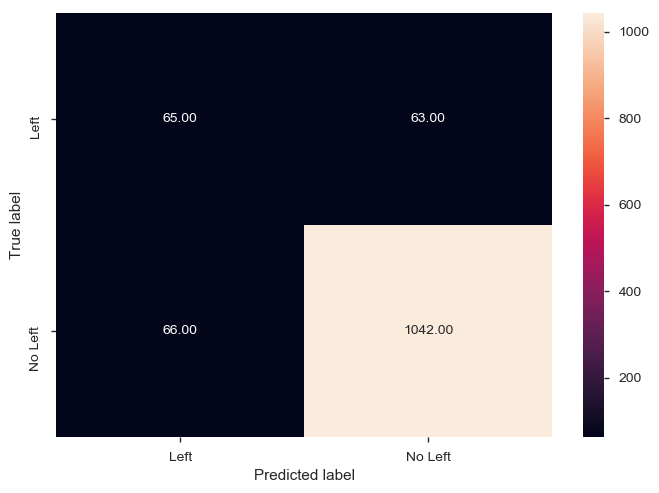

In [141]:
tree_bg = metrics.confusion_matrix( y_pred.predicted,
                                 y_pred.actual,
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [142]:
# compute the out-of-bag accuracy for B=500
bagclm.oob_score_

0.9084287200832466

### Tuning parameters

In [144]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100]}

from sklearn.model_selection import GridSearchCV
gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [145]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.3s finished


In [147]:
gscv_results.best_params_

{'n_estimators': 90}

In [148]:
gscv_results.best_score_

0.9035726673603884

## Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
RandomForestClassifier?

In [151]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [152]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8932038834951457

Text(0.5,28.3611,'Predicted label')

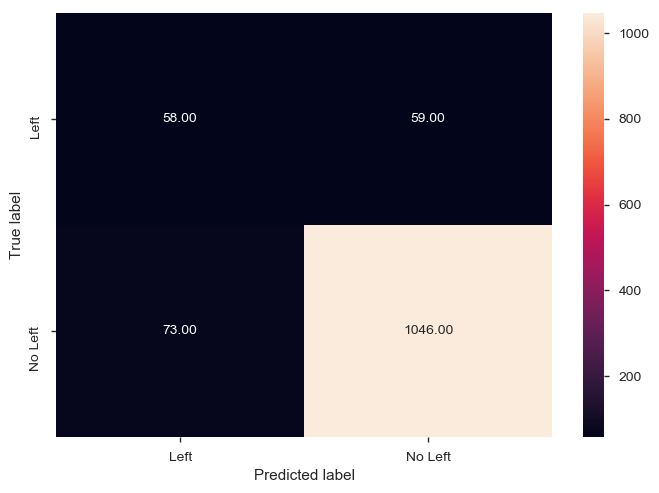

In [153]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [154]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

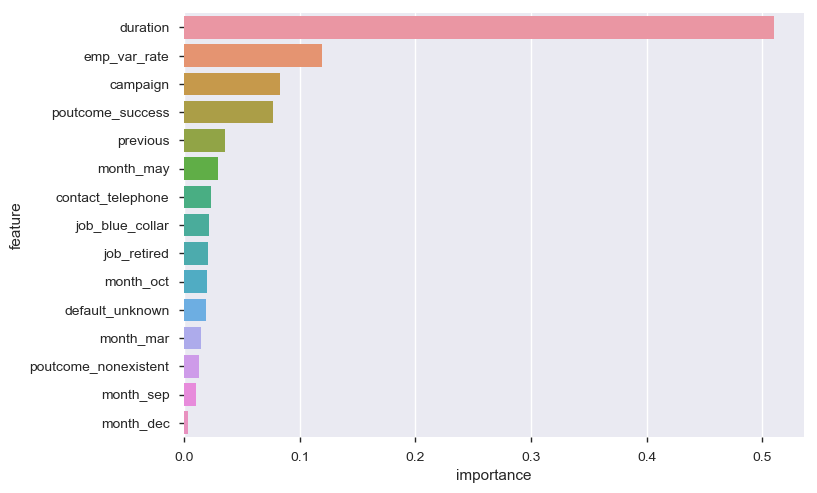

In [155]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

### Tuning parameters

In [157]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}

from sklearn.model_selection import GridSearchCV
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [158]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 209 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   39.9s finished


0.9073881373569199

In [159]:
gscv_results.best_params_

{'max_features': 10, 'n_estimators': 50}

### Boosting

#### Ada Boosting

In [160]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [161]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [162]:
from sklearn.model_selection import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [163]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [164]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 600}

In [165]:
clf_ada = gscv_ada.best_estimator_

In [166]:
gscv_ada.best_score_

0.909816163718349

#### Final model

In [167]:
ad=AdaBoostClassifier(learning_rate = 0.1, n_estimators=800)
ad.fit(train_X, train_y )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=800, random_state=None)

In [168]:
print(pd.Series(cross_val_score(clf_ada, train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

min     0.895833
mean    0.910158
max     0.920139
dtype: float64


### Gradient Boost

In [169]:
from sklearn.model_selection import GridSearchCV
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [170]:
gscv_gbm.best_params_

{'learning_rate': 0.01, 'n_estimators': 800}

In [171]:
clf_gbm = gscv_gbm.best_estimator_

gscv_gbm.best_score_

0.9129379118973292

In [172]:
gbm=GradientBoostingClassifier(learning_rate = 0.1, n_estimators=800)
gbm.fit(train_X, train_y )

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [173]:
print(pd.Series(cross_val_score(clf_gbm, train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

min     0.878472
mean    0.912239
max     0.923875
dtype: float64


### XGBOOST

In [174]:
from xgboost import XGBClassifier

In [175]:
#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)


In [176]:
xgb_estimator.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose=1)

In [177]:
xgb_estimator.predict(train_X)

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [178]:
metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1])

0.9689633730003901

In [179]:
metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1])

0.9312389900176159

In [180]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2563
           1       0.83      0.65      0.73       320

   micro avg       0.95      0.95      0.95      2883
   macro avg       0.89      0.82      0.85      2883
weighted avg       0.94      0.95      0.94      2883

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1105
           1       0.54      0.45      0.49       131

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.74      0.70      0.72      1236
weighted avg       0.89      0.90      0.90      1236



In [181]:
# with all tuning parameters

In [182]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [183]:
xgb_estimator.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpa=1, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.8,
       verbose=1)

In [184]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

0.9742464884900508
0.9316880245932783


In [185]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2563
           1       0.84      0.68      0.76       320

   micro avg       0.95      0.95      0.95      2883
   macro avg       0.90      0.83      0.86      2883
weighted avg       0.95      0.95      0.95      2883

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.55      0.48      0.51       131

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.75      0.72      0.73      1236
weighted avg       0.90      0.90      0.90      1236



#### Naive Bayes

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [188]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5,28.3611,'Predicted label')

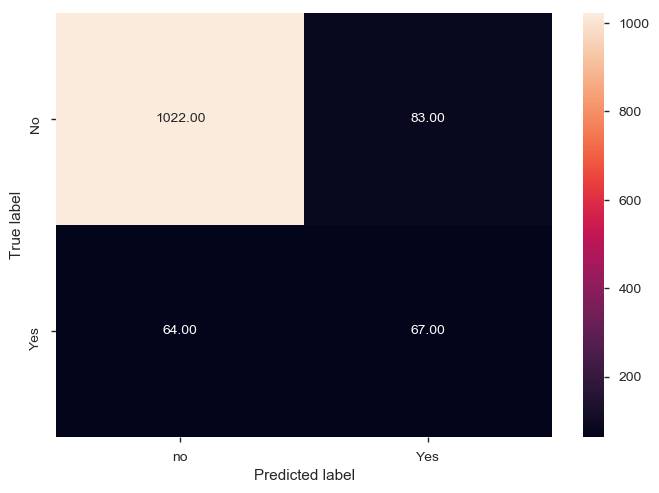

In [189]:
nb_cm = metrics.confusion_matrix( test_y,nb_clf.predict( test_X) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [190]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

0.8810679611650486

#### KNN

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn

In [194]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [195]:
knn_clf.fit(train_X, train_y)

knn_clf.best_score_

0.899063475546306

In [196]:
knn_clf.best_params_

{'n_neighbors': 11}

In [197]:
#Building for the n_neighbors=9
knn_clf = KNeighborsClassifier( n_neighbors =9 )

In [198]:
knn_clf.fit( train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [199]:
knn_cm = metrics.confusion_matrix(test_y, knn_clf.predict( test_X ) )

Text(0.5,28.3611,'Predicted label')

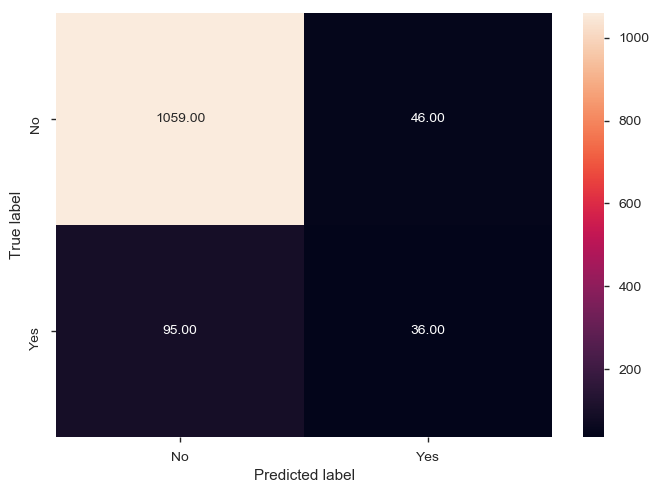

In [200]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [201]:
metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

0.8859223300970874

## Support Vector Machines (SVC)

In [144]:
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

#pca = RandomizedPCA(n_components=10, whiten=True, random_state=42)
#svc = SVC(kernel='rbf', class_weight='balanced')
#model = make_pipeline(pca, svc)
model = SVC(kernel='rbf', class_weight='balanced')

In [147]:
model.fit(train_X, train_y)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [145]:
SVC?

In [148]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X, train_y)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [150]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [151]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1105
           1       0.36      0.68      0.47       131

   micro avg       0.84      0.84      0.84      1236
   macro avg       0.66      0.77      0.69      1236
weighted avg       0.89      0.84      0.86      1236



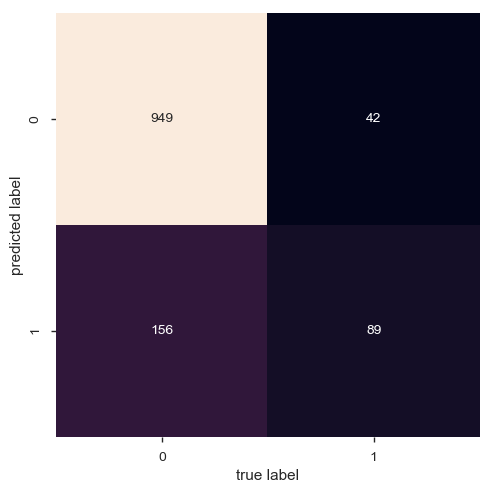

In [152]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_y, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Artificial Neural Networks (ANN)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [154]:
# Now apply the transformations to the data:
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
from sklearn.neural_network import MLPClassifier

In [156]:
MLPClassifier?

In [162]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [163]:
mlp.fit(train_X,train_y)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [164]:
predictions = mlp.predict(test_X)

In [165]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y,predictions))

[[1059   46]
 [  72   59]]


In [166]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1105
           1       0.56      0.45      0.50       131

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.75      0.70      0.72      1236
weighted avg       0.90      0.90      0.90      1236



In [167]:
mlp.coefs_

[array([[-0.62129994, -0.07986111, -0.19931927, -0.2413143 ,  0.29076102,
         -0.17937584,  0.27075088,  0.32178411, -0.30721966, -0.46225501,
         -0.46940952, -0.14828964, -0.3826947 ,  0.26449772, -0.05606006,
         -0.21859163, -0.28806003,  0.3796765 ,  0.01845536, -0.4750942 ,
         -0.04894579, -0.52958454,  0.52809528, -0.57029865, -0.43786278,
         -0.19351165,  0.283265  ,  0.26642117, -0.32029603,  0.09576831],
        [-0.34839111,  0.22710688, -0.22206523,  0.05667368,  0.06158001,
          0.22720646, -0.02974882, -0.3207833 , -0.13593687,  0.15230977,
         -0.43741465,  0.00100765,  0.36945349, -0.24705238, -0.28093714,
         -0.42668658, -0.19640336, -0.11284561,  0.4209303 , -0.34629627,
         -0.36834509, -0.45437246,  0.34355569,  0.42215806, -0.23978033,
          0.48968388,  0.04110548, -0.26664717,  0.35886124,  0.26828817],
        [ 0.02937311, -0.12782425, -0.25822346, -0.27670127, -0.10166772,
         -0.44043669,  0.39910372, -

In [168]:
len(mlp.coefs_)

4

In [169]:
len(mlp.coefs_[0])

15

In [170]:
len(mlp.intercepts_[0])

30

### Applying automation

In [154]:
def execute_model(estimator, features, features_set):
    
    train_features = train_X[features]
    train_labels = train_y
    
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    
    # Fit(train) the model on training data
    model = estimator.fit(train_features, train_labels)
    
    return print_metrics(model, features, features_set)

In [155]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, y_test, y_scores,t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(6,3))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')
    
def find_cutoff(y_test,y_scores):
    #p, r, thresholds = precision_recall_curve(y_test, y_scores)
    #precision_recall_threshold(p, r, thresholds, y_test, y_scores, 0.20)
    #plot_precision_recall_vs_threshold(p, r, thresholds)
    
    fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)    
    plot_roc_curve(fpr, tpr, 'recall_optimized')
    return auc(fpr, tpr) # AUC of ROC

In [156]:
def print_metrics(model, features, features_set):
    
    model_string = str(model).split('(')[0]
    print("Model: ",str(model_string))
    df = pd.DataFrame(columns=metrics_df.columns)    
    
    for typ in ["Train","Test"]:
        print("************************** {} **************************".format(typ))
        
        if typ == 'Train':
            y = train_y
            if model == 'BASELINE':       
                pred = pd.Series(index=y.index.copy())
                pred.fillna(y.mode()[0],inplace=True)
                auc = (metrics.roc_auc_score(y, pred)*100).round(2)
            else:
                pred = model.predict(train_X[features])
                prob = model.predict_proba(train_X[features])[:,1]
                auc = (find_cutoff(y,prob)*100).round(2)
            acc = (metrics.accuracy_score(y, pred)*100).round(2)
            print("Train Accuracy : {} %.".format(acc))        
        else:            
            y = test_y
            if model == 'BASELINE':
                pred = pd.Series(index=y.index.copy())
                pred.fillna(y.mode()[0],inplace=True)
                auc = (metrics.roc_auc_score(y, pred)*100).round(2)
            else:                
                pred = model.predict(test_X[features])
                prob = model.predict_proba(test_X[features])[:,1]
                auc = (find_cutoff(y,prob)*100).round(2)
                
        #auc = (metrics.roc_auc_score(y, pred)*100).round(2)
        print("AUC : {} %.".format(auc))
        
        df.loc[-1] = [model,model_string,"AUC",typ,auc,features_set]
        df.index = df.index + 1

    return df

In [157]:
def find_best_features(model, ftr_names='', count=50,verbose=False):
    if ftr_names == '':
        ftr_names = list(all_features) + ['IT']

    # Print the results    
    feature_rank = pd.DataFrame([ftr_names,list(model.feature_importances_)]).T.sort_values(by=[1],ascending=False).reset_index(drop=True)
    feature_rank.columns = ["Predictor","Importance"]
    feature_rank = feature_rank.iloc[0:-1,:]
    if verbose:
        print("Features sorted by their score:")
        print(feature_rank.head(count))
    sns.barplot( y = 'Predictor', x = 'Importance', data = feature_rank.head(20) )
    plt.show()
    return feature_rank['Predictor'].head(count)

In [158]:
metrics_df = pd.DataFrame(columns=["Model","Model Name","Metric","Train_Test","Value","Features_used"])

## Creating Models without tuning parameters

### 1. Logistic Regression

In [159]:
from sklearn.model_selection import train_test_split

X = selected_features_from_KBest
y = data_new['y_yes']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
all_features = train_X.columns

Training Features Shape: (2883, 15)
Training Labels Shape: (2883,)
Model:  LogisticRegression
************************** Train **************************
Train Accuracy : 91.88 %.
AUC : 93.6 %.
************************** Test **************************
AUC : 92.92 %.


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


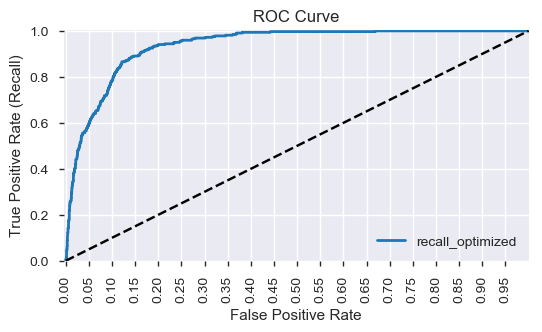

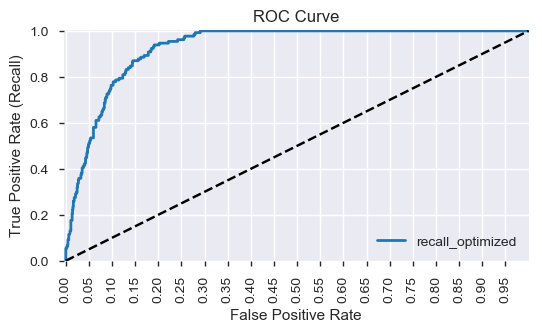

In [161]:
#All Columns
metrics_df = metrics_df.append(execute_model(LogisticRegression(), all_features, 'ALL'))

### 2. RandomForestClassifier

Training Features Shape: (2883, 15)
Training Labels Shape: (2883,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Model:  RandomForestClassifier
************************** Train **************************


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Train Accuracy : 99.93 %.
AUC : 100.0 %.
************************** Test **************************


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


AUC : 90.77 %.


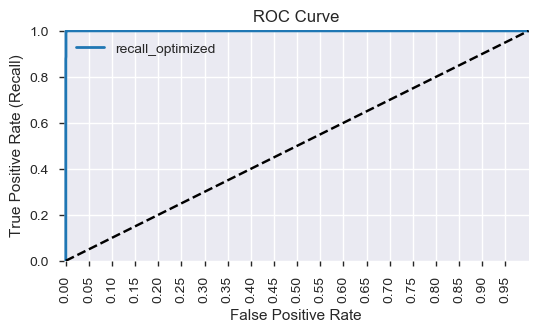

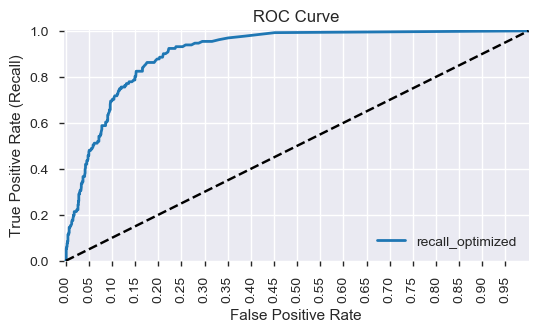

In [163]:
#All Columns
from  sklearn.ensemble import RandomForestClassifier
n_trees=500
rf_all_estimator = RandomForestClassifier(n_estimators=n_trees,
                                          random_state = 42,
                                          n_jobs=-1,
                                          verbose=1)
metrics_df = metrics_df.append(execute_model(rf_all_estimator, all_features, 'ALL'))

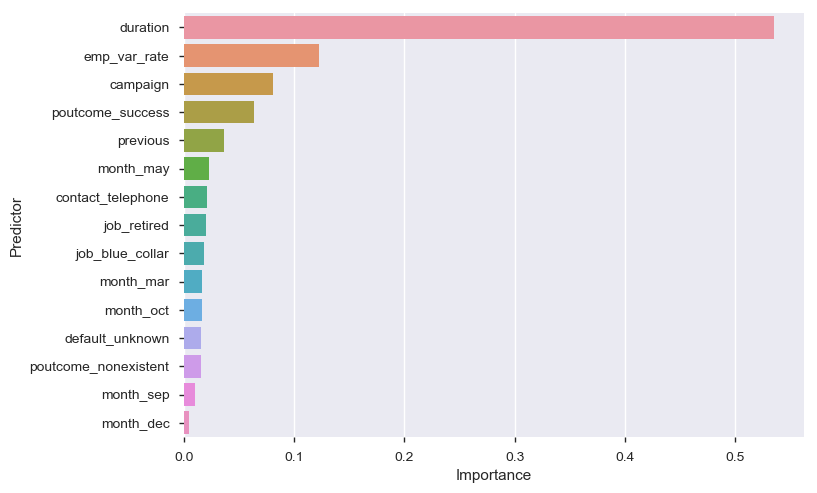

Random Forest Best features are:
 0                 duration
1             emp_var_rate
2                 campaign
3         poutcome_success
4                 previous
5                month_may
6        contact_telephone
7              job_retired
8          job_blue_collar
9                month_mar
10               month_oct
11         default_unknown
12    poutcome_nonexistent
13               month_sep
14               month_dec
Name: Predictor, dtype: object


In [164]:
rf_features = find_best_features(rf_all_estimator, '', count=20,verbose=False)
print("Random Forest Best features are:\n",rf_features)

Training Features Shape: (2883, 15)
Training Labels Shape: (2883,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Model:  RandomForestClassifier
************************** Train **************************


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished


Train Accuracy : 99.93 %.
AUC : 99.99 %.
************************** Test **************************


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished


AUC : 90.74 %.


,Model,Model Name,Metric,Train_Test,Value,Features_used
1,"(DecisionTreeClassifier(class_weight=None, cri...",RandomForestClassifier,AUC,Train,99.99,RF
0,"(DecisionTreeClassifier(class_weight=None, cri...",RandomForestClassifier,AUC,Test,90.74,RF


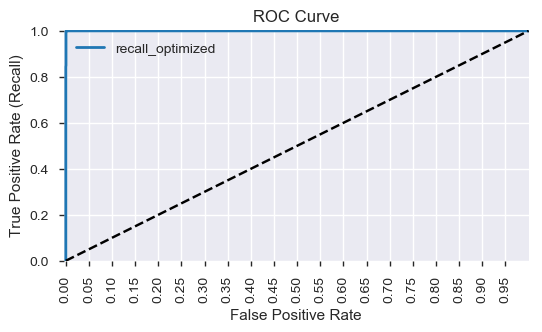

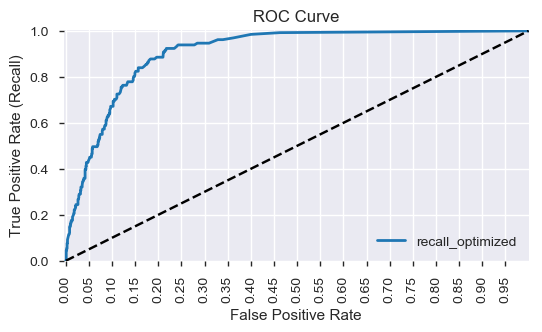

In [165]:
# Best features from Random Forest feature importance
estimator = RandomForestClassifier(n_estimators=n_trees,
                                   random_state = 42,
                                    n_jobs=-1,
                                    verbose=1)
execute_model(estimator, rf_features, 'RF')

### 3. XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#All Columns
n_trees=500
xgb_estimator = XGBClassifier(n_estimators=n_trees,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)
metrics_df = metrics_df.append(execute_model(xgb_estimator, all_features, 'ALL'))

In [ ]:
xgb_features = find_best_features(xgb_estimator, '', count=20,verbose=False)
print("XGBoost Best features are:\n",xgb_features)

In [ ]:
#Using XGBoost Columns
estimator = XGBClassifier(n_estimators=n_trees,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)
execute_model(estimator, xgb_features, 'XGB')

### Consolidate all the metrics

In [ ]:
metrics_df

In [ ]:
df = metrics_df[['Model Name','Features_used','Metric', 'Train_Test','Value']]
df.set_index(['Model Name','Features_used','Metric', 'Train_Test'],drop=True,inplace=True)
df.unstack()
df.unstack().to_csv("Metrics.csv")
df

### Saving as pickle object

In [ ]:
#Lets save everything in metrics_df to pickle object
import pickle

In [ ]:
# now you can save it to a file
with open('metrics_df.pkl', 'wb') as f:
    pickle.dump(metrics_df, f)

In [ ]:
# and later you can load it
with open('metrics_df.pkl', 'rb') as f:
    metrics_df = pickle.load(f)

## Creating Models with tuning parameters

### 1.  Logistic Regression

In [ ]:
from pactools.grid_search import GridSearchCVProgressBar

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
lr_model = LogisticRegression()

In [ ]:
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

gridsearch = GridSearchCVProgressBar(lr_model, parameters, cv=5)

gridsearch.fit(train_X,train_y)

gridsearch.best_params_

In [ ]:
from yellowbrick.model_selection import ValidationCurve

In [ ]:
viz = ValidationCurve( LogisticRegression(), 
                      param_name="C",
                      param_range=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], cv=StratifiedKFold(n_splits=4), scoring="f1_weighted")

# Fit and poof the visualizer
viz.fit(train_X, train_y)
viz.poof()

In [ ]:
best_C = 60
best_penalty = gridsearch.best_params_['penalty']

In [ ]:
lr_model1 = LogisticRegression(C=best_C, penalty=best_penalty)
execute_model(lr_model1,all_features,'ALL')

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
scores, pvalues = chi2(train_X, train_y)
significant = pd.DataFrame(list(zip(all_features, p_values)), columns=['Predictor', 'Pvalue'])
significant = significant[significant.Pvalue < 0.05].sort_values(by=['Pvalue'])
significant.shape

In [ ]:
metrics_df = metrics_df.append(execute_model(LogisticRegression(), list(significant.Predictor), 'FINAL'))

### 2.  Random Forest Classifier

In [ ]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

In [ ]:
def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [ ]:
def objective_rf(params):
    params = {'n_estimators': int(params['n_estimators']),'max_features': int(params['max_features'])}
    clf = RandomForestClassifier(n_jobs=4,  **params)
    score = cross_val_score(clf, train_X, train_y, scoring=gini_scorer, cv=StratifiedKFold(n_splits=4)).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

In [ ]:
grid = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 25),
    'max_features': hp.quniform('max_features', 50, 150, 20)
}

best = fmin(fn=objective_rf,
            space=grid,
            algo=tpe.suggest,
            max_evals=10)

print("Hyperopt estimated optimum {}".format(best))

In [ ]:
viz = ValidationCurve( RandomForestClassifier(max_features=60), 
                      param_name="n_estimators",
                      param_range=[60,80,100,120,140], cv=StratifiedKFold(n_splits=4), scoring="f1_weighted")

# Fit and poof the visualizer
viz.fit(train_X, train_y)
viz.poof()

In [ ]:
#Execution with best parameters
estimator_one = RandomForestClassifier(n_estimators=80, 
                                       max_features=60,
                                       random_state=42,
                                        n_jobs=-1,
                                        verbose=1)
execute_model(estimator_one, all_features, 'RF')

In [ ]:
best_predictors_rf = find_best_features(model=estimator_one,ftr_names=list(all_features),count=60,verbose=False)

In [ ]:
final_estimator = RandomForestClassifier(n_estimators=80, max_features=60, random_state=42)
metrics_df = metrics_df.append(execute_model(final_estimator, best_predictors_rf, 'FINAL'))

### 3.  XGBoostClassifier

In [ ]:
#Import libraries:
import xgboost as xgb

In [ ]:
def objective_xgb(params):
    params = {'n_estimators': int(params['n_estimators'])}
    clf = XGBClassifier(n_jobs=4,  **params)
    score = cross_val_score(clf, train_X, train_y, scoring=gini_scorer, cv=StratifiedKFold(n_splits=4)).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

In [ ]:
grid = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 25)
}

best = fmin(fn=objective_xgb,
            space=grid,
            algo=tpe.suggest,
            max_evals=5)

print("Hyperopt estimated optimum {}".format(best))

In [ ]:
viz = ValidationCurve( XGBClassifier(max_features=60), 
                      param_name="n_estimators",
                      param_range=[10, 30, 50, 70, 90, 110], cv=StratifiedKFold(n_splits=4), scoring="f1_weighted")

# Fit and poof the visualizer
viz.fit(train_X, train_y)
viz.poof()

In [ ]:
#Execution with best parameters
estimator_two = XGBClassifier(n_estimators=100, 
                                       max_features=60,
                                       random_state=42,
                                        n_jobs=-1,
                                        verbose=1)
execute_model(estimator_two, all_features, 'ALL')

In [ ]:
best_predictors_xgb = find_best_features(model=estimator_two,ftr_names=list(all_features),count=60,verbose=False)

In [ ]:
final_estimator_xgb = XGBClassifier(n_estimators=80, max_features=60, random_state=42)
metrics_df = metrics_df.append(execute_model(final_estimator_xgb, best_predictors_xgb, 'FINAL'))

In [ ]:
metrics_df = metrics_df.reset_index(drop=True)

In [ ]:
### Saving as pickle objects for future use

In [ ]:
# now you can save it to a file
with open('metrics_df.pkl', 'wb') as f:
    pickle.dump(metrics_df, f)

In [ ]:
# and later you can load it
with open('metrics_df.pkl', 'rb') as f:
    metrics_df = pickle.load(f)

In [ ]:
df = metrics_df[['Model_Name','Features_used','Metric', 'Train_Test','Value']]
df.set_index(['Model_Name','Features_used','Metric', 'Train_Test'],drop=True,inplace=True)
df.unstack()
df.unstack().to_csv("Metrics.csv")
df

In [ ]:
def plot_metric(metric,ftrs_used):
    df = metrics_df[(metrics_df.Metric == metric) & (metrics_df.Features_used == ftrs_used)]
    plt.figure(figsize=(11,4))
    ax = sns.pointplot(x='Model_Name', y='Value', data=df[df.Train_Test == 'Train'], color='red')
    [ax.text(p[0], p[1]+5, p[1], color='g') for p in zip(ax.get_xticks(), df['Value'][df.Train_Test == 'Train'])]
    ax.set_yticks(list(range(50,101,20)), minor=False)
    ax = sns.pointplot(x='Model_Name', y='Value', data=df[df.Train_Test == 'Test'], color='green')
    [ax.text(p[0], p[1]-5, p[1], color='g') for p in zip(ax.get_xticks(), df['Value'][df.Train_Test == 'Test'])]
    ax.set_yticks(list(range(40,101,20)), minor=False)
    plt.grid(True)
    plt.title("FEATURES = "+ftrs_used)

In [ ]:
plot_metric('AUC','ALL')

In [ ]:
plot_metric('AUC','FINAL')

### Converting imbalance data into Balance data

In [219]:
from imblearn.over_sampling import RandomOverSampler 

In [216]:
y.value_counts()

0    3668
1     451
Name: y_yes, dtype: int64

In [220]:
ros = RandomOverSampler(random_state=42)

In [221]:
X_res, y_res = ros.fit_sample(X, y)

In [222]:
y.value_counts()

0    3668
1     451
Name: y_yes, dtype: int64

In [224]:
y_res_s = pd.Series(y_res)

In [225]:
y_res_s.value_counts()

1    3668
0    3668
dtype: int64